# Proyecto Data Science - Primer Entrega

## DataSet: Credit Card Approvals 

### Descripción de la DataSet

Las tarjetas de calificación crediticia son un método de control de riesgos habitual en el sector financiero. Utiliza la información personal y los datos presentados por los solicitantes de tarjetas de crédito para predecir la probabilidad de futuros impagos y préstamos de tarjetas de crédito. El banco puede decidir si emite una tarjeta de crédito al solicitante. Las puntuaciones de crédito pueden cuantificar objetivamente la magnitud del riesgo.

Las columnas son las siguientes:

Gender: 0=Female, 1=Male

Age: Age in years

Debt: Outstanding debt (feature has been scaled)

Married: 0=Single/Divorced/etc, 1=Married

BankCustomer: 0=does not have a bank account, 1=has a bank account

Industry: job sector of current or most recent job

Ethnicity

YearsEmployed

PriorDefault: 0=no prior defaults, 1=prior default

Employed: 0=not employed, 1=employed

CreditScore (this feature has been scaled)

DriversLicense: 0=no license, 1=has license

Citizen: Citizenship, either ByBirth, ByOtherMeans or Temporary

ZipCode

Income (this feature has been scaled)

Approved: 0=not approved, 1=approved


#### Leemos y visualizamos la DataSet

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling
from ydata_profiling import ProfileReport
from scipy.stats import chi2_contingency
import colorama
from colorama import Fore
from scipy.stats import iqr
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import sys
import joblib
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder

In [47]:
df=pd.read_csv(r'/home/anakin/Documents/CursoDataScience/candidatos2/clean_dataset.csv')

In [48]:
df.head()

Gender    Age   Debt  Married  BankCustomer     Industry Ethnicity  \
0       1  30.83  0.000        1             1  Industrials     White   
1       0  58.67  4.460        1             1    Materials     Black   
2       0  24.50  0.500        1             1    Materials     Black   
3       1  27.83  1.540        1             1  Industrials     White   
4       1  20.17  5.625        1             1  Industrials     White   

   YearsEmployed  PriorDefault  Employed  CreditScore  DriversLicense  \
0           1.25             1         1            1               0   
1           3.04             1         1            6               0   
2           1.50             1         0            0               0   
3           3.75             1         1            5               1   
4           1.71             1         0            0               0   

        Citizen  ZipCode  Income  Approved  
0       ByBirth      202       0         1  
1       ByBirth       43     560         1  
2       ByBirth      280     824         1  
3       ByBirth      100       3         1  
4  ByOtherMeans      120       0         1

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


### Hipotesis del proyecto

- Utilizar la DataSet para generar un algortimo de Machine Learning para predecir si un cliente es apto o no para recibir un crédito.

#### Generamos algunos gráficos y estadisticos para estudiar las variables de la DataSet y econtrar insights

In [6]:
df.describe().T

count         mean          std    min     25%     50%  \
Gender          690.0     0.695652     0.460464   0.00   0.000    1.00   
Age             690.0    31.514116    11.860245  13.75  22.670   28.46   
Debt            690.0     4.758725     4.978163   0.00   1.000    2.75   
Married         690.0     0.760870     0.426862   0.00   1.000    1.00   
BankCustomer    690.0     0.763768     0.425074   0.00   1.000    1.00   
YearsEmployed   690.0     2.223406     3.346513   0.00   0.165    1.00   
PriorDefault    690.0     0.523188     0.499824   0.00   0.000    1.00   
Employed        690.0     0.427536     0.495080   0.00   0.000    0.00   
CreditScore     690.0     2.400000     4.862940   0.00   0.000    0.00   
DriversLicense  690.0     0.457971     0.498592   0.00   0.000    0.00   
ZipCode         690.0   180.547826   173.970323   0.00  60.000  160.00   
Income          690.0  1017.385507  5210.102598   0.00   0.000    5.00   
Approved        690.0     0.444928     0.497318   0.00   0.000    0.00   

                     75%        max  
Gender            1.0000       1.00  
Age              37.7075      80.25  
Debt              7.2075      28.00  
Married           1.0000       1.00  
BankCustomer      1.0000       1.00  
YearsEmployed     2.6250      28.50  
PriorDefault      1.0000       1.00  
Employed          1.0000       1.00  
CreditScore       3.0000      67.00  
DriversLicense    1.0000       1.00  
ZipCode         272.0000    2000.00  
Income          395.5000  100000.00  
Approved          1.0000       1.00

In [7]:
df.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

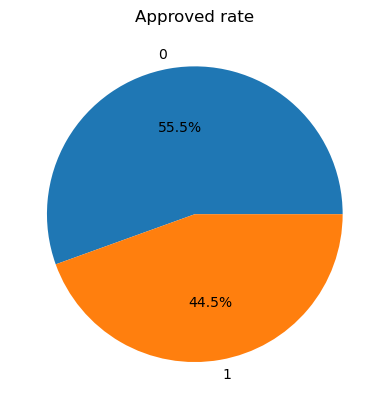

In [8]:
pie_x, pie_y = np.unique(df['Approved'], return_counts=True)
plt.pie(pie_y, labels=pie_x, autopct = '%1.1f%%') 
plt.title('Approved rate')
plt.show()

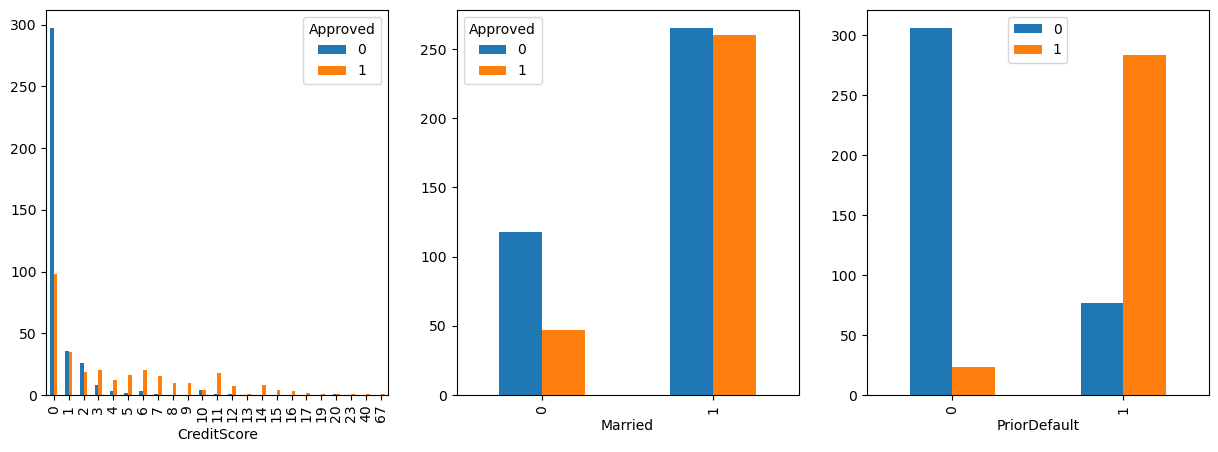

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
a = df.groupby(['CreditScore', 'Approved'])['Approved'].count().unstack('Approved')
b = df.groupby(['Married', 'Approved'])['Approved'].count().unstack('Approved')
c = df.groupby(['PriorDefault', 'Approved'])['Approved'].count().unstack('Approved')
a.plot(kind='bar', ax=ax[0])
b.plot(kind='bar', ax=ax[1])
c.plot(kind='bar', ax=ax[2])
ax[2].legend(loc='upper center')
plt.show()

Insights:

- Mayor puntuación crediticia, mayor tasa de aprobación.
- Estar casado o no, no importa para la tasa de aprobación.
- Aumenta la morosidad previa, disminuye la tasa de aprobación.

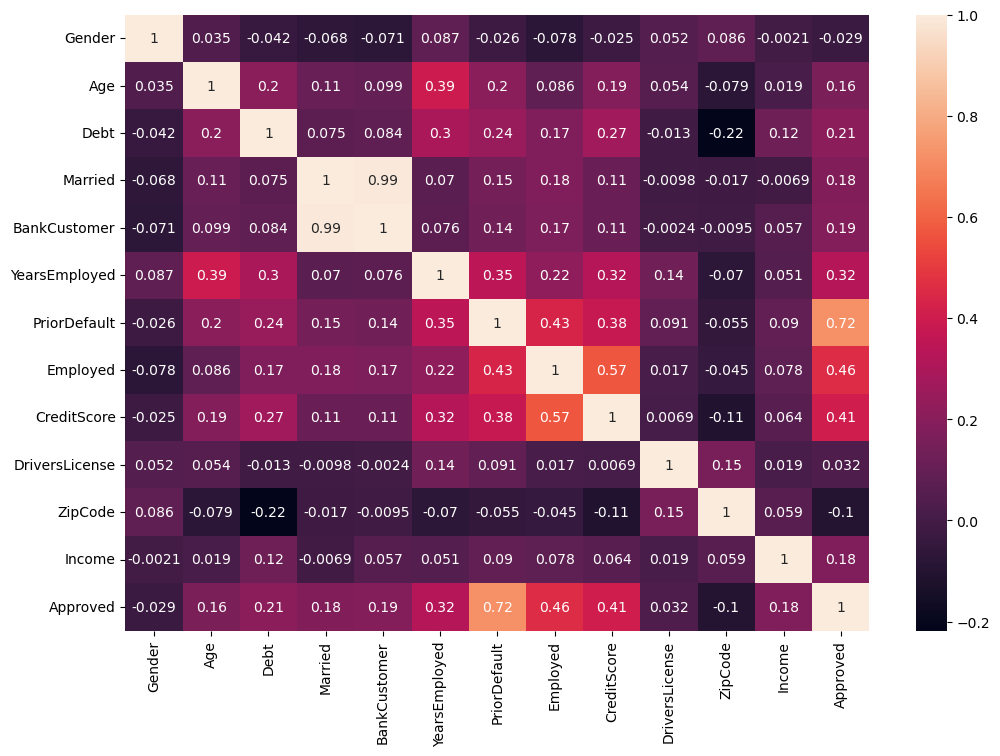

In [10]:
num_col = df.select_dtypes(exclude = object)
plt.figure(figsize=(12,8))
sns.heatmap(num_col.corr(), annot=True)
plt.show()

- La variable 'Prior Default' tiene una alta correlación con la variable 'Approved'. Las personas con impagos anteriores tendrán dificultades en el proceso de aprobación de la tarjeta de crédito.
- Las variables 'Employed' y 'Credit Score' tienen una correlación positiva con la variables 'Approved'. Las personas con empleo y una puntuación crediticia alta tendrán ventaja en el proceso de aprobación de la tarjeta de crédito.

In [11]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [50]:
df.Citizen.value_counts()

ByBirth         625
ByOtherMeans     57
Temporary         8
Name: Citizen, dtype: int64

In [51]:
df.Ethnicity.value_counts()

White     408
Black     138
Asian      59
Latino     57
Other      28
Name: Ethnicity, dtype: int64

In [52]:
df.Industry.value_counts()

Energy                   146
Materials                 78
Industrials               64
ConsumerDiscretionary     59
ConsumerStaples           54
Healthcare                53
Financials                51
InformationTechnology     41
CommunicationServices     38
Utilities                 38
Real Estate               30
Education                 25
Research                  10
Transport                  3
Name: Industry, dtype: int64

In [53]:
# Creamos el codificador indicandole el orden de la variables
# La variables tomaran valores enteros partiendo del cero en el siguiente orden

encoder = OrdinalEncoder(categories=[['Energy', 'Materials', 'Industrials', 'ConsumerDiscretionary', 
                                      'ConsumerStaples', 'Healthcare', 'Financials', 'InformationTechnology',
                                     'CommunicationServices', 'Utilities', 'Real Estate', 'Education',
                                     'Research', 'Transport']])

# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(df[["Industry"]])
df["Industry-encoded"] = encoder.transform(df[["Industry"]])

In [54]:
df[["Industry", "Industry-encoded"]].head()

Industry  Industry-encoded
0  Industrials               2.0
1    Materials               1.0
2    Materials               1.0
3  Industrials               2.0
4  Industrials               2.0

In [55]:
# Creamos el codificador indicandole el orden de la variables
# La variables tomaran valores enteros partiendo del cero en el siguiente orden

encoder = OrdinalEncoder(categories=[['ByBirth', 'ByOtherMeans', 'Temporary']])

# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(df[["Citizen"]])
df["Citizen-encoded"] = encoder.transform(df[["Citizen"]])

In [57]:
df[["Citizen", "Citizen-encoded"]].head()

Citizen  Citizen-encoded
0       ByBirth              0.0
1       ByBirth              0.0
2       ByBirth              0.0
3       ByBirth              0.0
4  ByOtherMeans              1.0

In [58]:
# Creamos el codificador indicandole el orden de la variables
# La variables tomaran valores enteros partiendo del cero en el siguiente orden

encoder = OrdinalEncoder(categories=[['White', 'Black', 'Asian', 'Latino', 'Other']])

# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(df[["Ethnicity"]])
df["Ethnicity-encoded"] = encoder.transform(df[["Ethnicity"]])

In [59]:
df[["Ethnicity", "Ethnicity-encoded"]].head()

Ethnicity  Ethnicity-encoded
0     White                0.0
1     Black                1.0
2     Black                1.0
3     White                0.0
4     White                0.0

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             690 non-null    int64  
 1   Age                690 non-null    float64
 2   Debt               690 non-null    float64
 3   Married            690 non-null    int64  
 4   BankCustomer       690 non-null    int64  
 5   Industry           690 non-null    object 
 6   Ethnicity          690 non-null    object 
 7   YearsEmployed      690 non-null    float64
 8   PriorDefault       690 non-null    int64  
 9   Employed           690 non-null    int64  
 10  CreditScore        690 non-null    int64  
 11  DriversLicense     690 non-null    int64  
 12  Citizen            690 non-null    object 
 13  ZipCode            690 non-null    int64  
 14  Income             690 non-null    int64  
 15  Approved           690 non-null    int64  
 16  Industry-encoded   690 non

In [61]:
df = df.drop(['Industry', 'Ethnicity', 'Citizen'], 1)

/tmp/ipykernel_2769/4030325112.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['Industry', 'Ethnicity', 'Citizen'], 1)


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             690 non-null    int64  
 1   Age                690 non-null    float64
 2   Debt               690 non-null    float64
 3   Married            690 non-null    int64  
 4   BankCustomer       690 non-null    int64  
 5   YearsEmployed      690 non-null    float64
 6   PriorDefault       690 non-null    int64  
 7   Employed           690 non-null    int64  
 8   CreditScore        690 non-null    int64  
 9   DriversLicense     690 non-null    int64  
 10  ZipCode            690 non-null    int64  
 11  Income             690 non-null    int64  
 12  Approved           690 non-null    int64  
 13  Industry-encoded   690 non-null    float64
 14  Citizen-encoded    690 non-null    float64
 15  Ethnicity-encoded  690 non-null    float64
dtypes: float64(6), int64(10)
m

#### Utilizamos un test $\chi^2$ y calculamos los diferentes p_values utilizando una significancia del 5%

In [68]:
category=['Gender','Married','BankCustomer','Industry-encoded','Ethnicity-encoded','PriorDefault','Employed','DriversLicense','Citizen-encoded','ZipCode', 'CreditScore', 'YearsEmployed', 'Approved']

In [69]:
df.loc[:,category]

Gender  Married  BankCustomer  Industry-encoded  Ethnicity-encoded  \
0         1        1             1               2.0                0.0   
1         0        1             1               1.0                1.0   
2         0        1             1               1.0                1.0   
3         1        1             1               2.0                0.0   
4         1        1             1               2.0                0.0   
..      ...      ...           ...               ...                ...   
685       1        0             0              11.0                1.0   
686       0        1             1               0.0                0.0   
687       0        0             0               5.0                3.0   
688       1        1             1               4.0                0.0   
689       1        1             1               0.0                1.0   

     PriorDefault  Employed  DriversLicense  Citizen-encoded  ZipCode  \
0               1         1               0              0.0      202   
1               1         1               0              0.0       43   
2               1         0               0              0.0      280   
3               1         1               1              0.0      100   
4               1         0               0              1.0      120   
..            ...       ...             ...              ...      ...   
685             0         0               0              0.0      260   
686             0         1               1              0.0      200   
687             0         1               1              0.0      200   
688             0         0               0              0.0      280   
689             0         0               1              0.0        0   

     CreditScore  YearsEmployed  Approved  
0              1           1.25         1  
1              6           3.04         1  
2              0           1.50         1  
3              5           3.75         1  
4              0           1.71         1  
..           ...            ...       ...  
685            0           1.25         0  
686            2           2.00         0  
687            1           2.00         0  
688            0           0.04         0  
689            0           8.29         0  

[690 rows x 13 columns]

Gender:


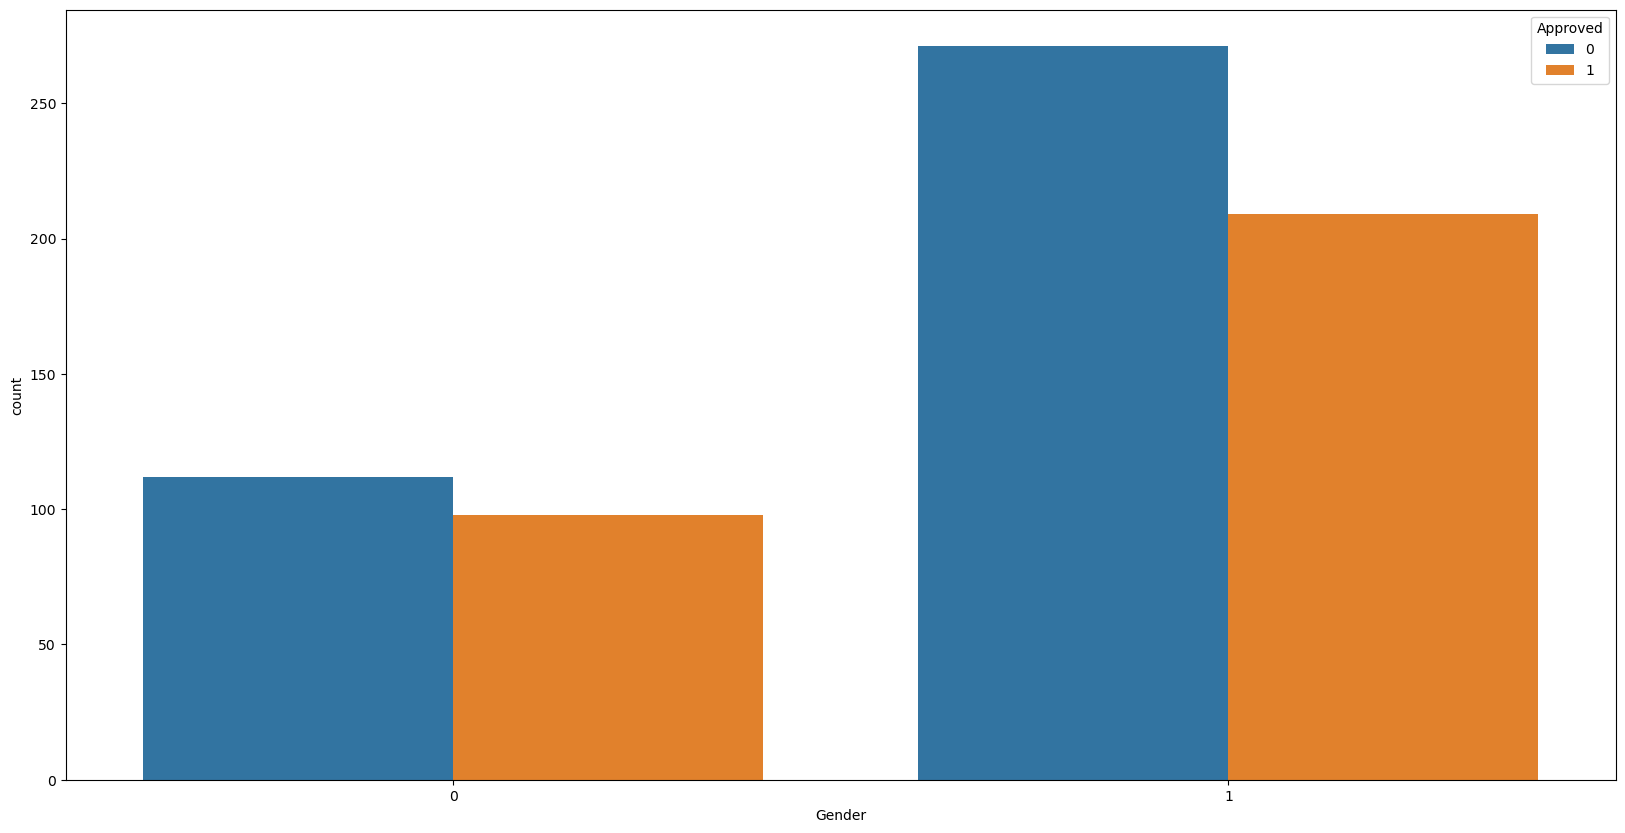

'Gender' is a 'bad Predictor'
p_val = 0.44723087514133186

Married:


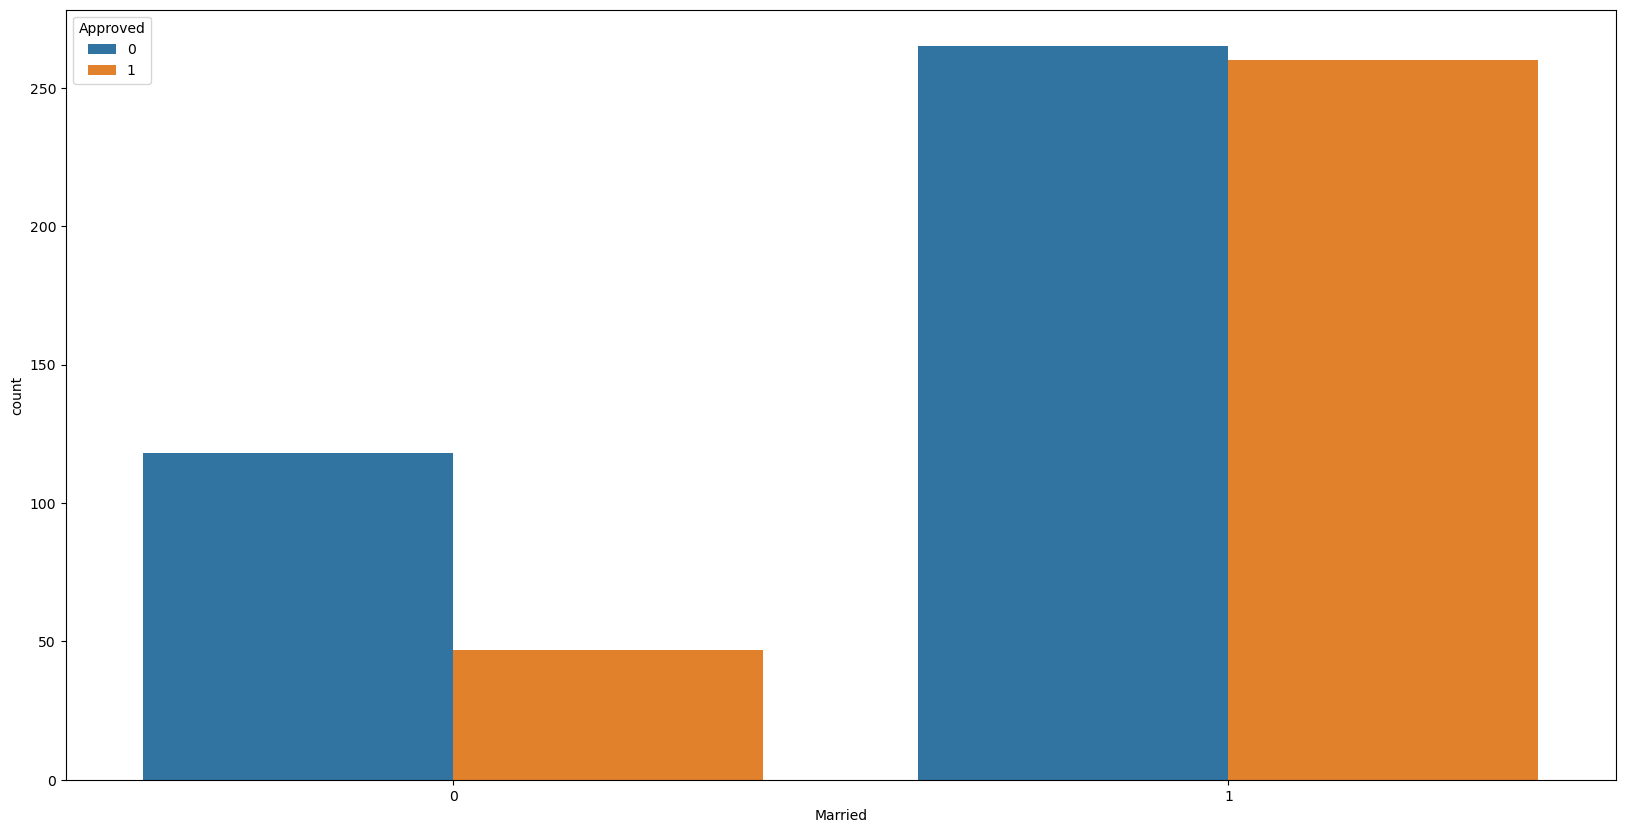

'Married' is a 'Good Predictor'
p_val = 2.100231920165588e-06

BankCustomer:


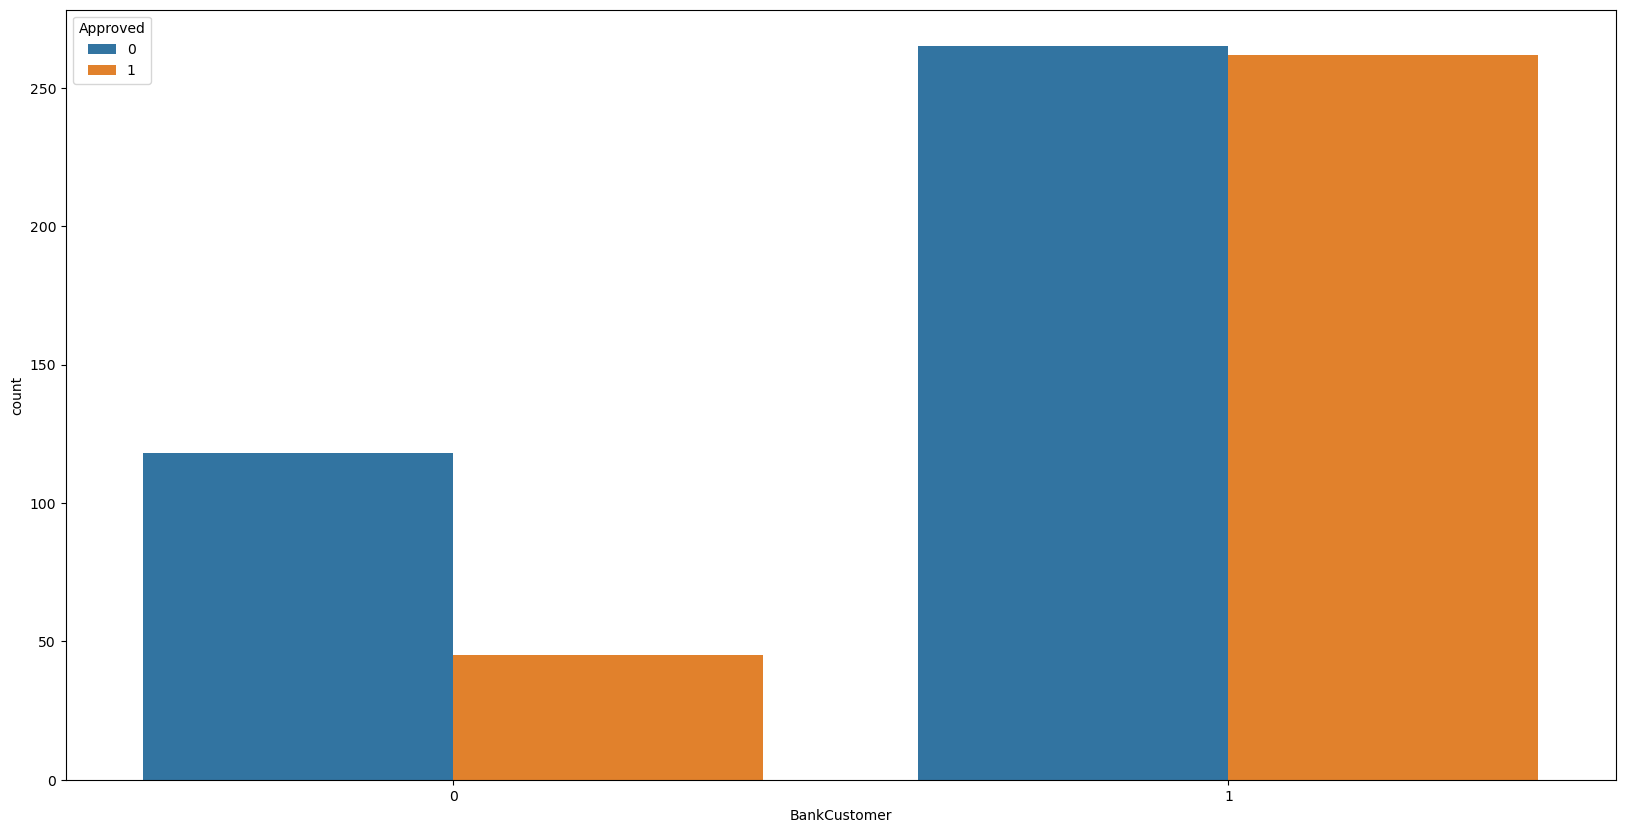

'BankCustomer' is a 'Good Predictor'
p_val = 6.91661320541803e-07

Industry-encoded:


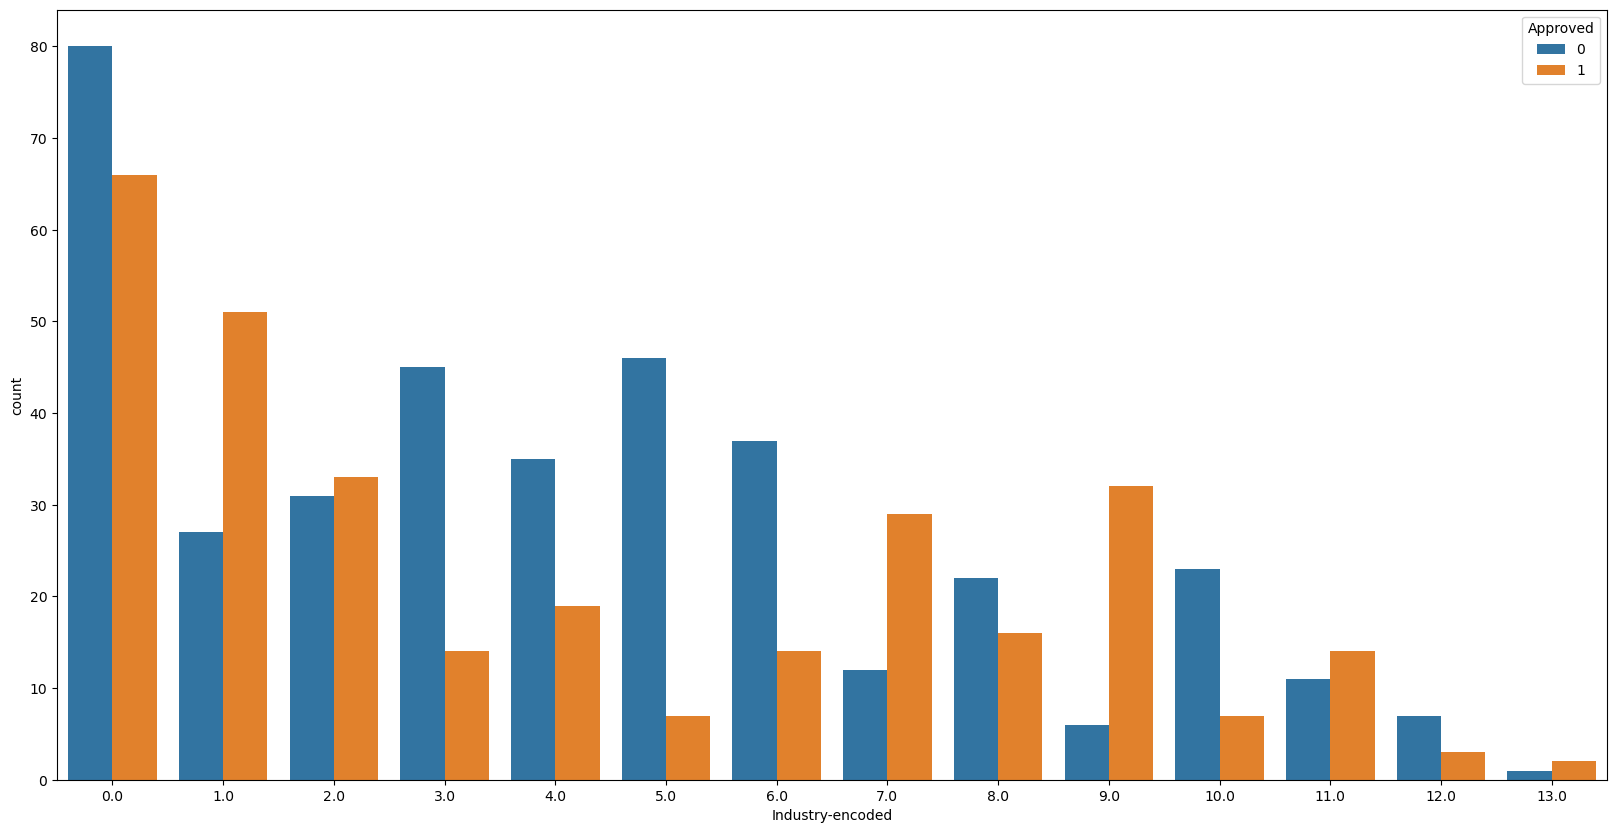

'Industry-encoded' is a 'Good Predictor'
p_val = 3.502987066102042e-15

Ethnicity-encoded:


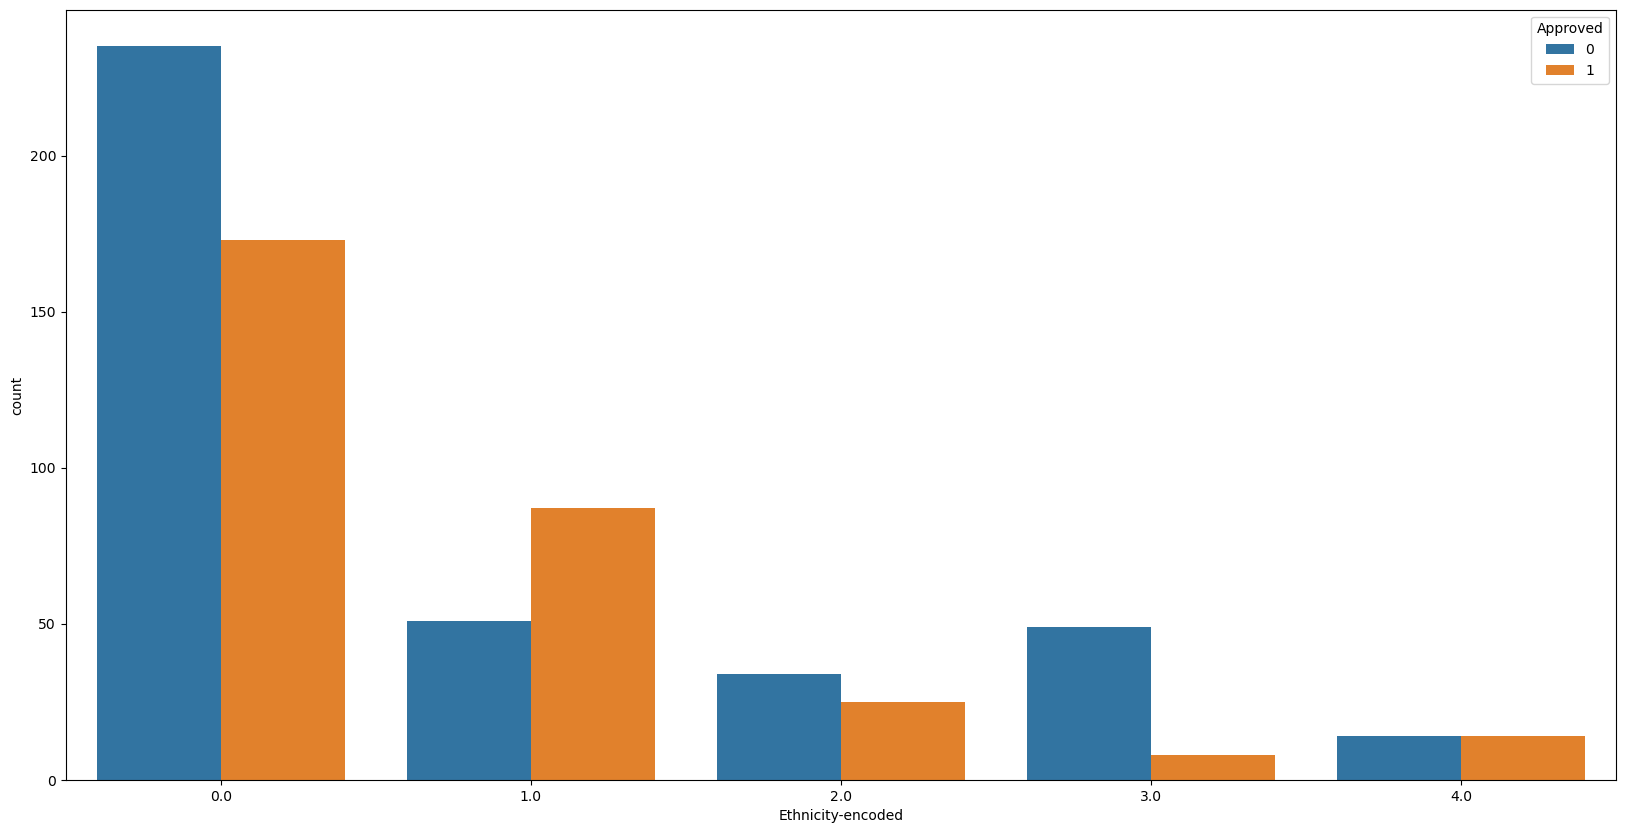

'Ethnicity-encoded' is a 'Good Predictor'
p_val = 1.8236656549346748e-08

PriorDefault:


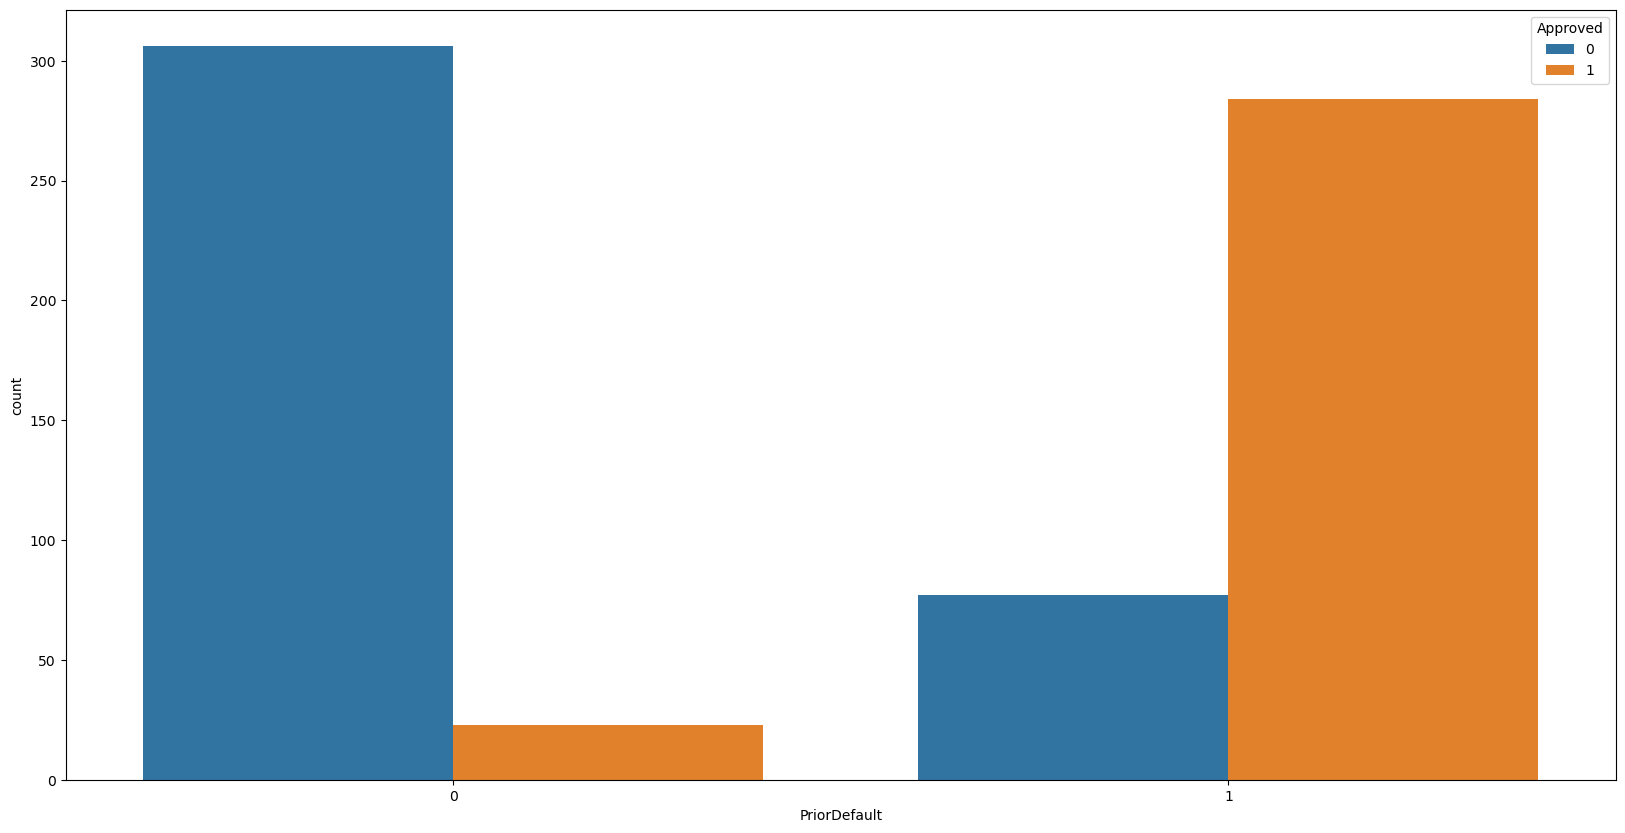

'PriorDefault' is a 'Good Predictor'
p_val = 7.298530125411298e-80

Employed:


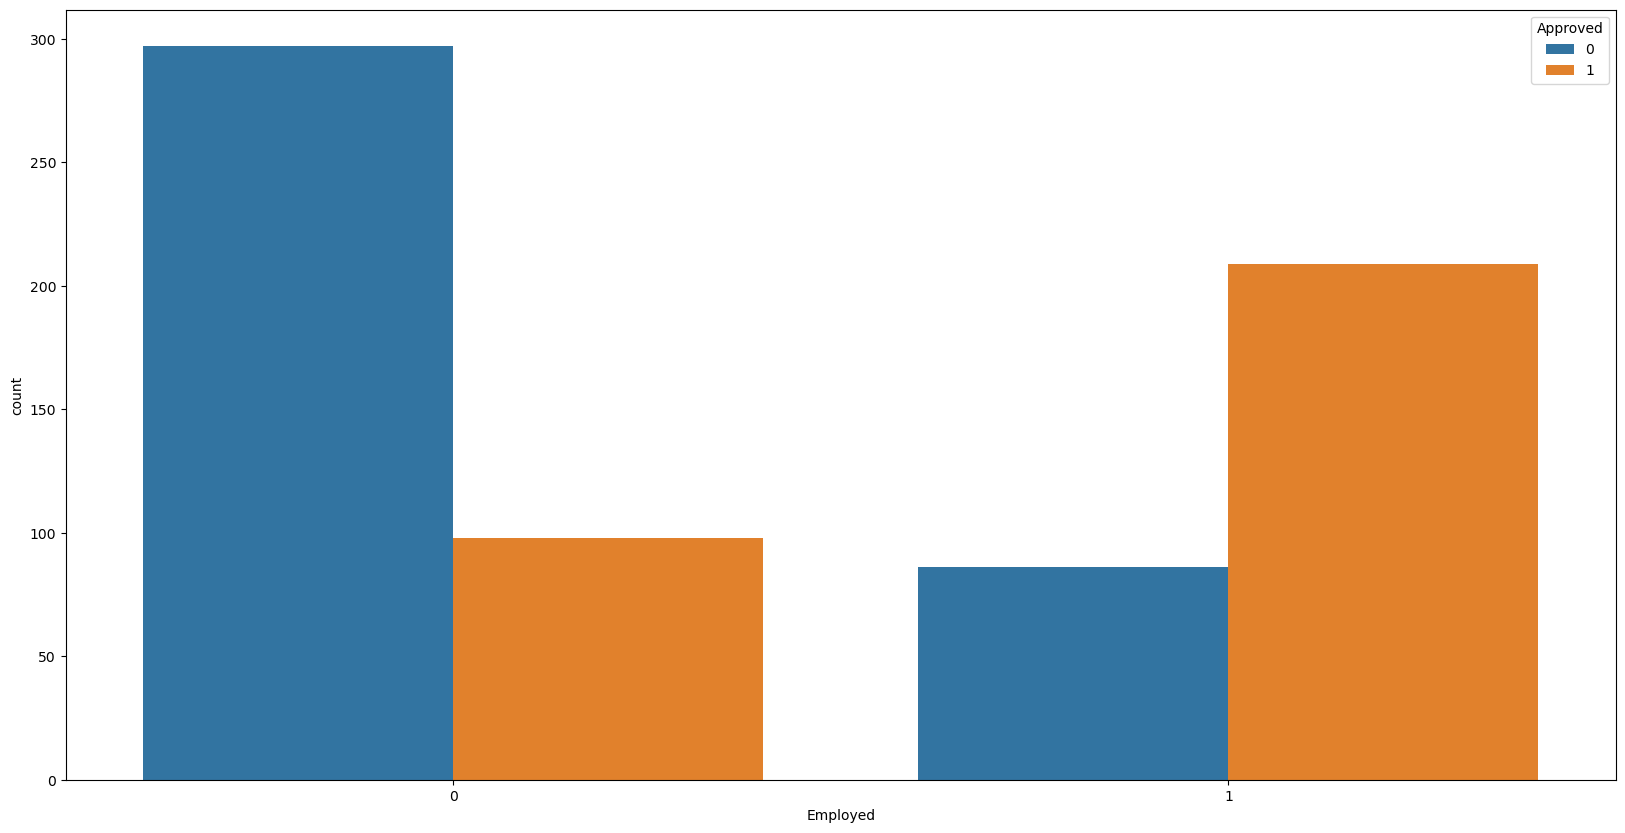

'Employed' is a 'Good Predictor'
p_val = 2.227269345312281e-33

DriversLicense:


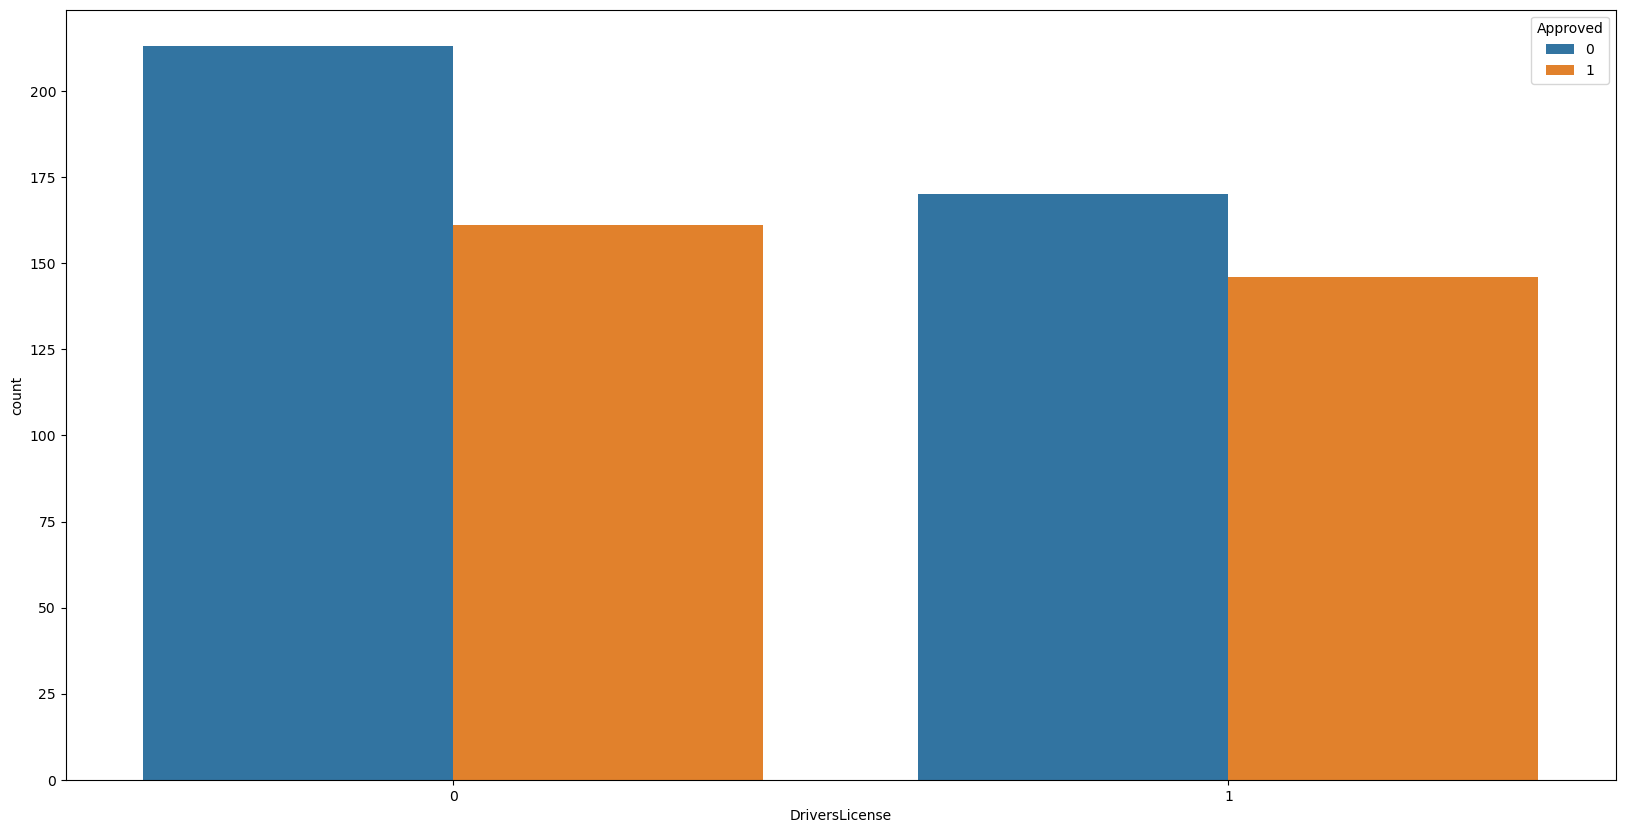

'DriversLicense' is a 'bad Predictor'
p_val = 0.4061341323141693

Citizen-encoded:


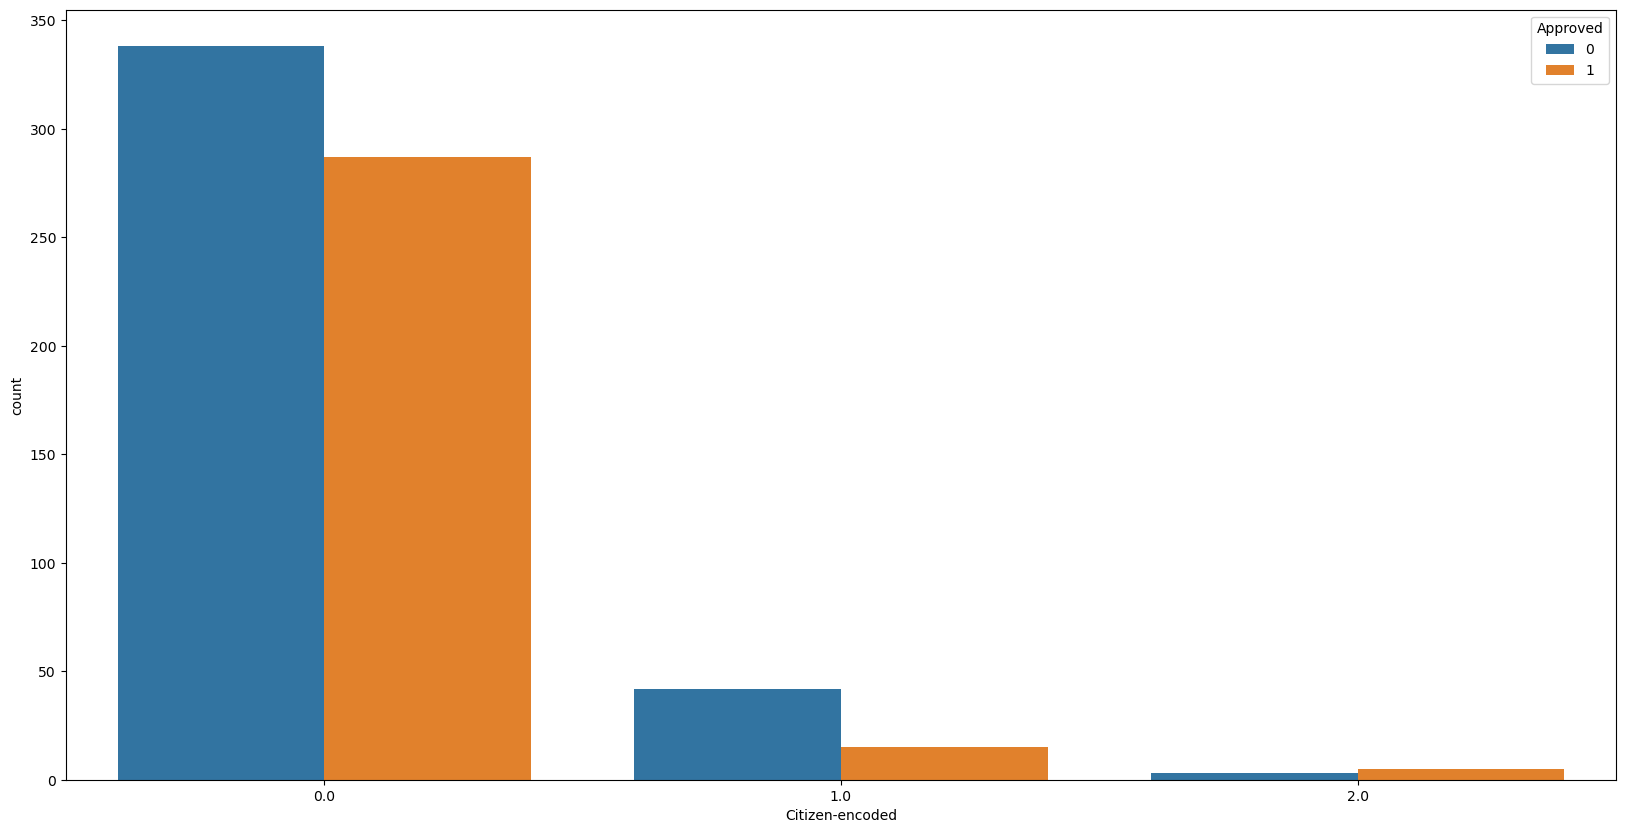

'Citizen-encoded' is a 'Good Predictor'
p_val = 0.010094291370456362

ZipCode:


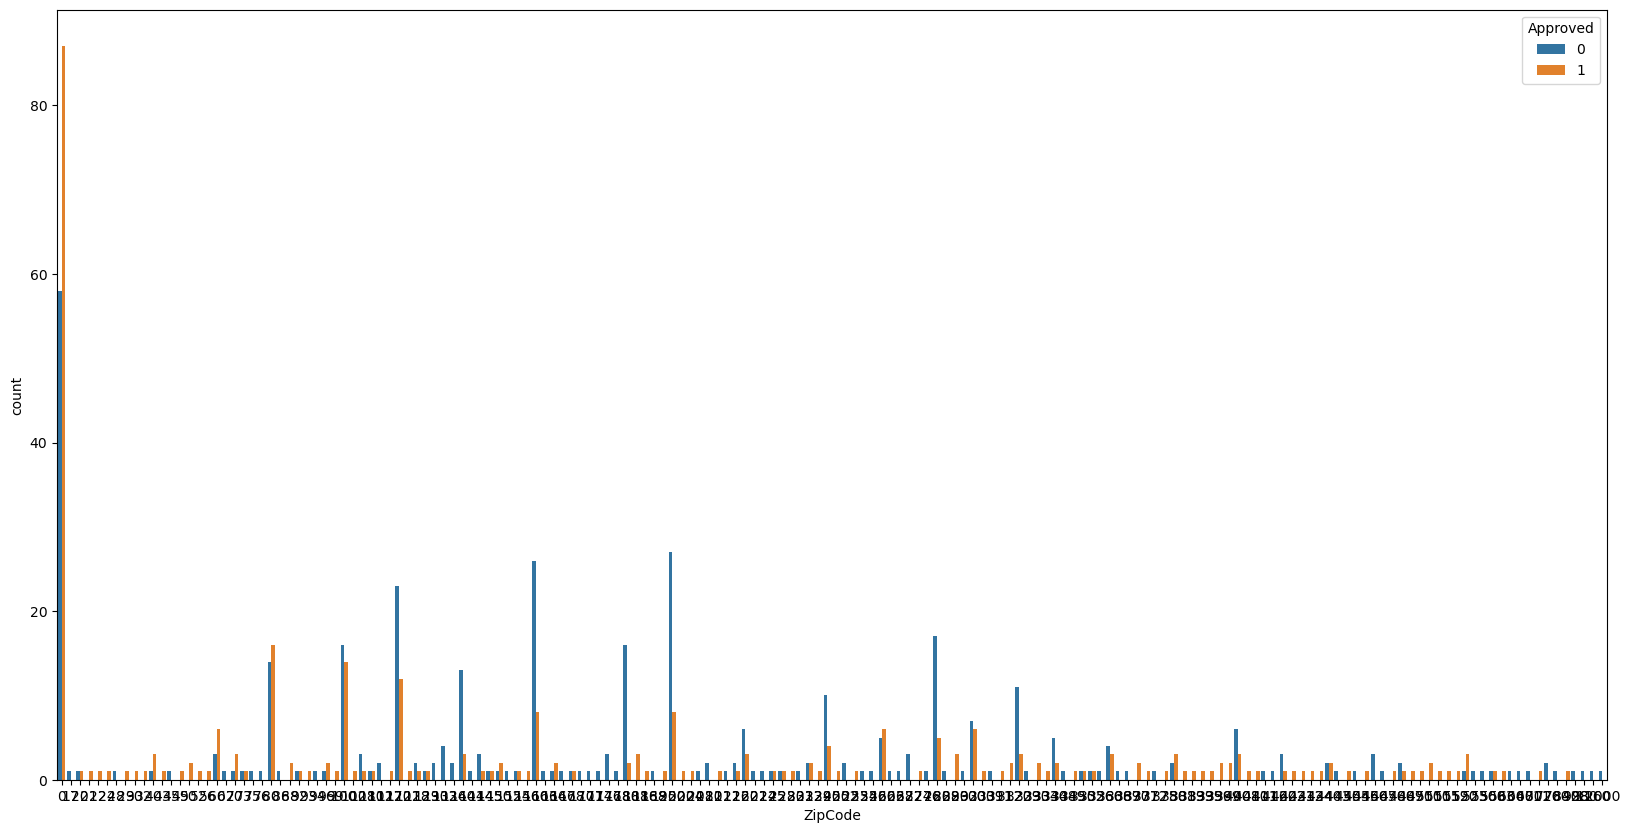

'ZipCode' is a 'Good Predictor'
p_val = 0.006354824252183887

CreditScore:


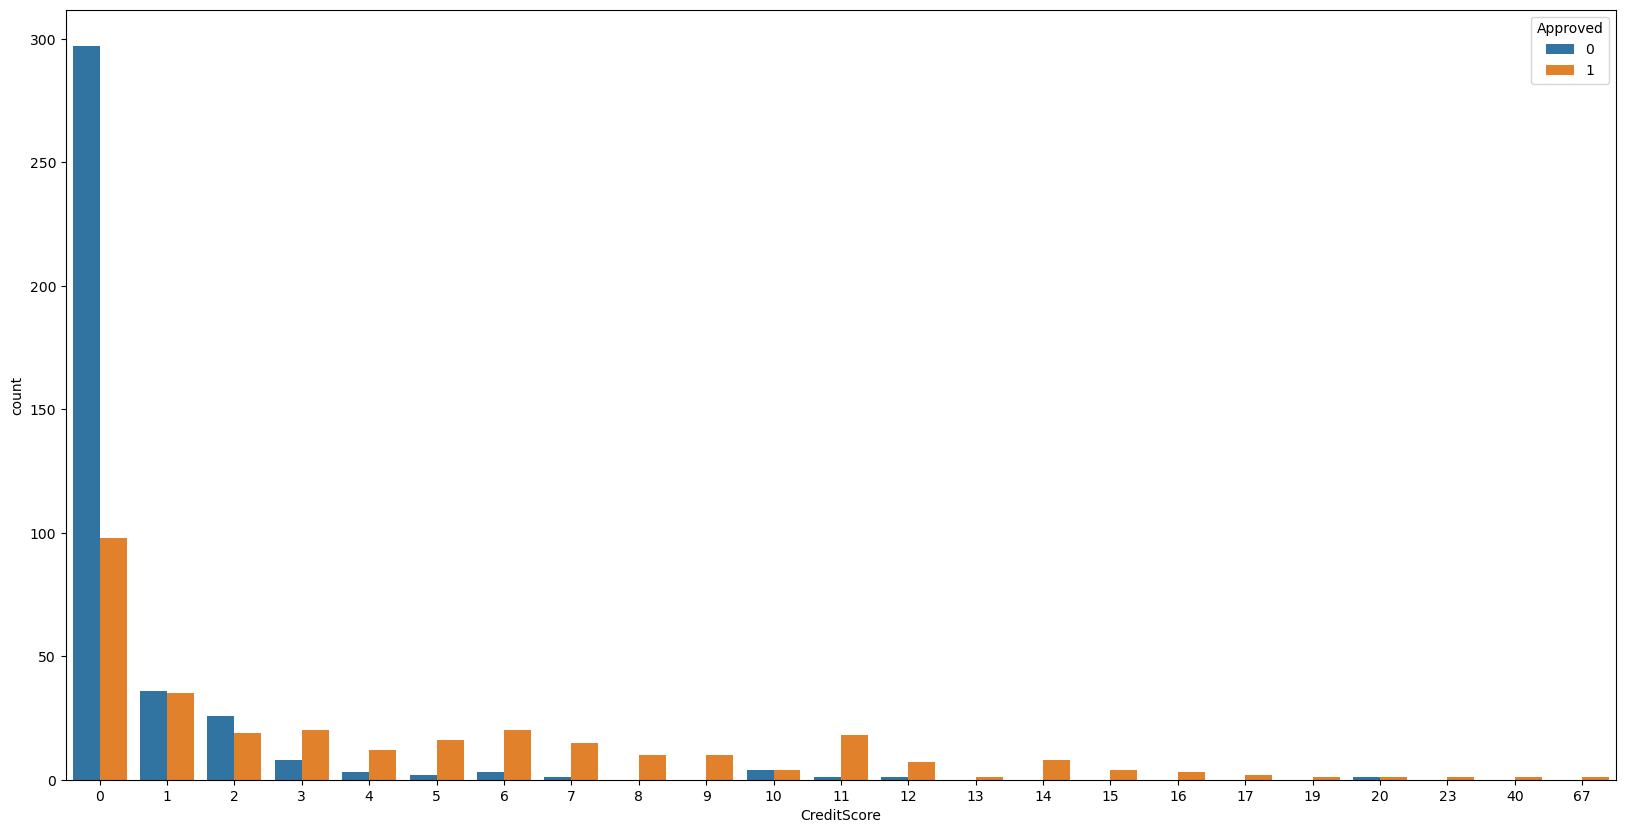

'CreditScore' is a 'Good Predictor'
p_val = 2.441239211959534e-31

YearsEmployed:


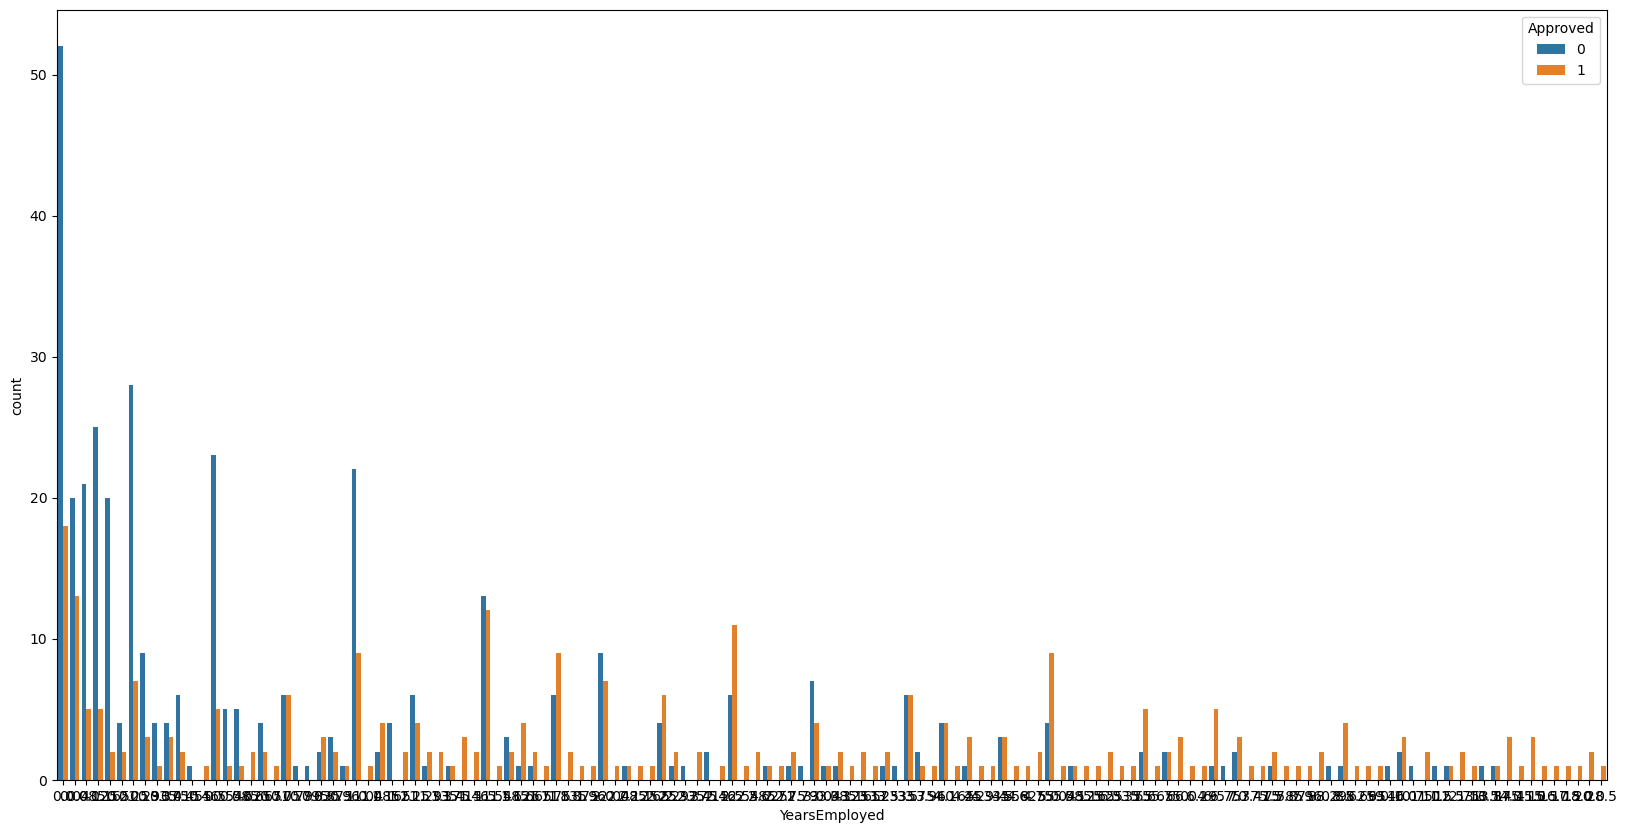

'YearsEmployed' is a 'Good Predictor'
p_val = 6.169823802314774e-06

Approved:


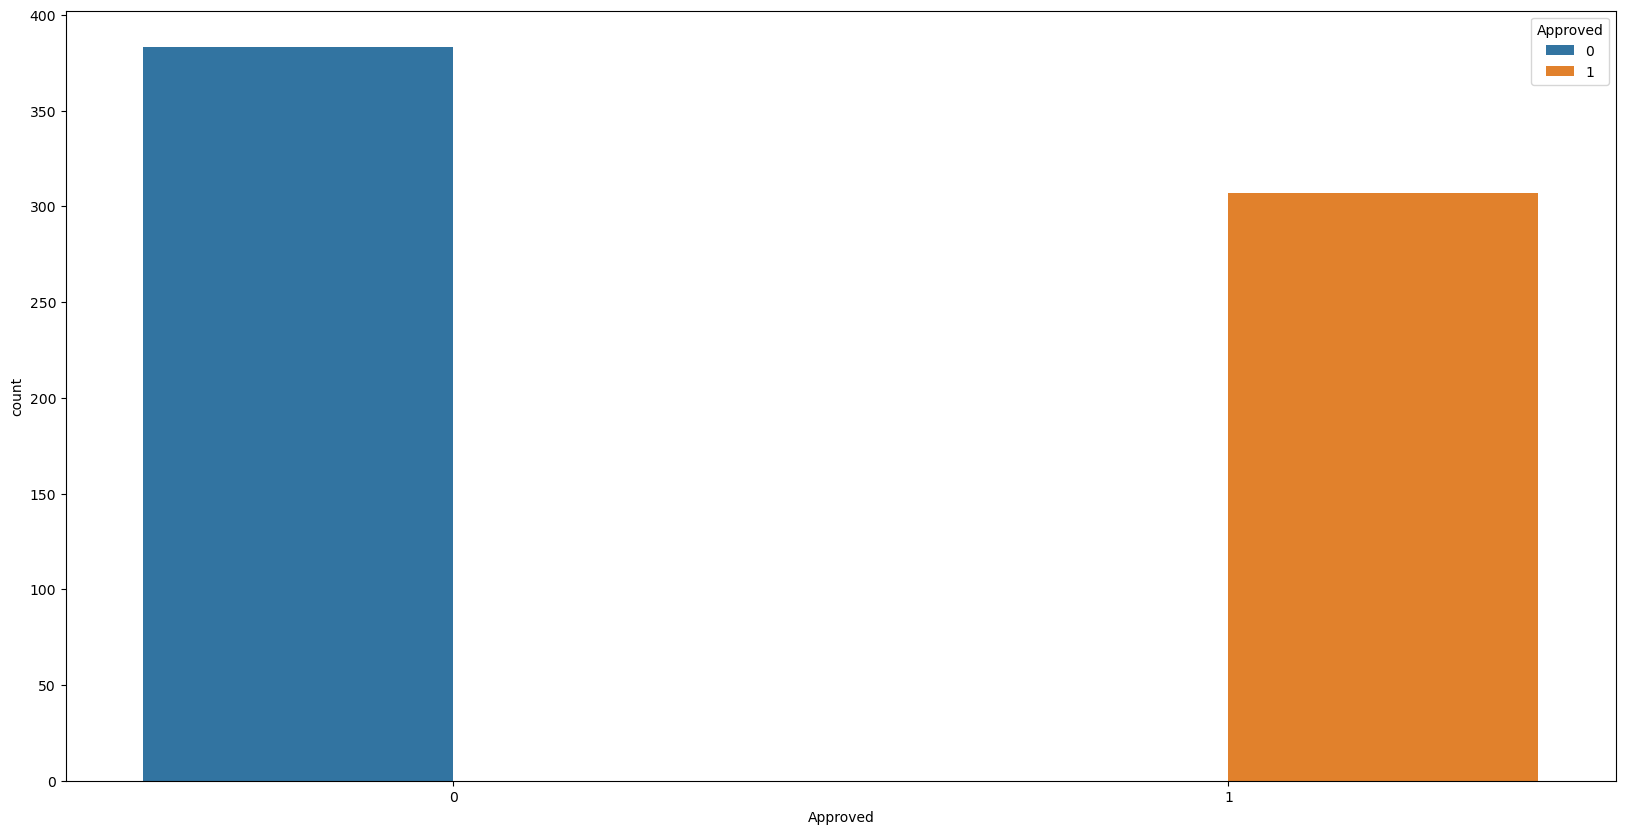

'Approved' is a 'Good Predictor'
p_val = 4.469841378183071e-152



In [70]:
for i in category:
    print(i+":")
    plt.figure(figsize=(20,10))
    sns.countplot(x=i,data=df,hue='Approved')
    plt.show()
    a=np.array(pd.crosstab(df.Approved,df[i]))
    (stats,p,dof,_)=chi2_contingency(a,correction=False)
    if p>0.05:
        print(Fore.RED +"'{}' is a 'bad Predictor'".format(i))
        print("p_val = {}\n".format(p))
    else:
        print(Fore.GREEN +"'{}' is a 'Good Predictor'".format(i))
        print("p_val = {}\n".format(p))

Algunas conclusiones que podemos decir son:

- Vemos que la mayoría de los titulares de tarjetas de crédito son Casados.
- La mayoría de los titulares de tarjetas de crédito son BankCustomers solamente.
- Los clientes bancarios tienen las mismas probabilidades de obtener la aprobación que de no obtenerla.
- Si el solicitante no es cliente de un banco, tiene más probabilidades de que le aprueben la tarjeta de crédito.
- La mayoría de los titulares de tarjetas de crédito trabajan en el sector de la energía.
- Hay una alta probabilidad de aprobación de la tarjeta de crédito si él / ella trabaja en el sector de la salud.

- Vemos que las personas pertenecientes a la etnia blanca utilizan mayoritariamente la tarjeta de crédito

- Las personas sin impagos tienen una alta probabilidad de aprobación de la tarjeta de crédito.
- Las personas con impagos tienen menos probabilidades de que les aprueben la tarjeta de crédito.
- Vemos que la mayoría de los titulares de tarjetas de crédito tienen la ciudadanía por nacimiento.

### Variables continuas:

In [33]:
column_names = df.columns.tolist()
continious=list(set(column_names)-set(category))

In [34]:
continious

['YearsEmployed', 'Debt', 'CreditScore', 'Age', 'Income']

In [35]:
df.loc[:,continious]

YearsEmployed    Debt  CreditScore    Age  Income
0             1.25   0.000            1  30.83       0
1             3.04   4.460            6  58.67     560
2             1.50   0.500            0  24.50     824
3             3.75   1.540            5  27.83       3
4             1.71   5.625            0  20.17       0
..             ...     ...          ...    ...     ...
685           1.25  10.085            0  21.08       0
686           2.00   0.750            2  22.67     394
687           2.00  13.500            1  25.25       1
688           0.04   0.205            0  17.92     750
689           8.29   3.375            0  35.00       0

[690 rows x 5 columns]

YearsEmployed:


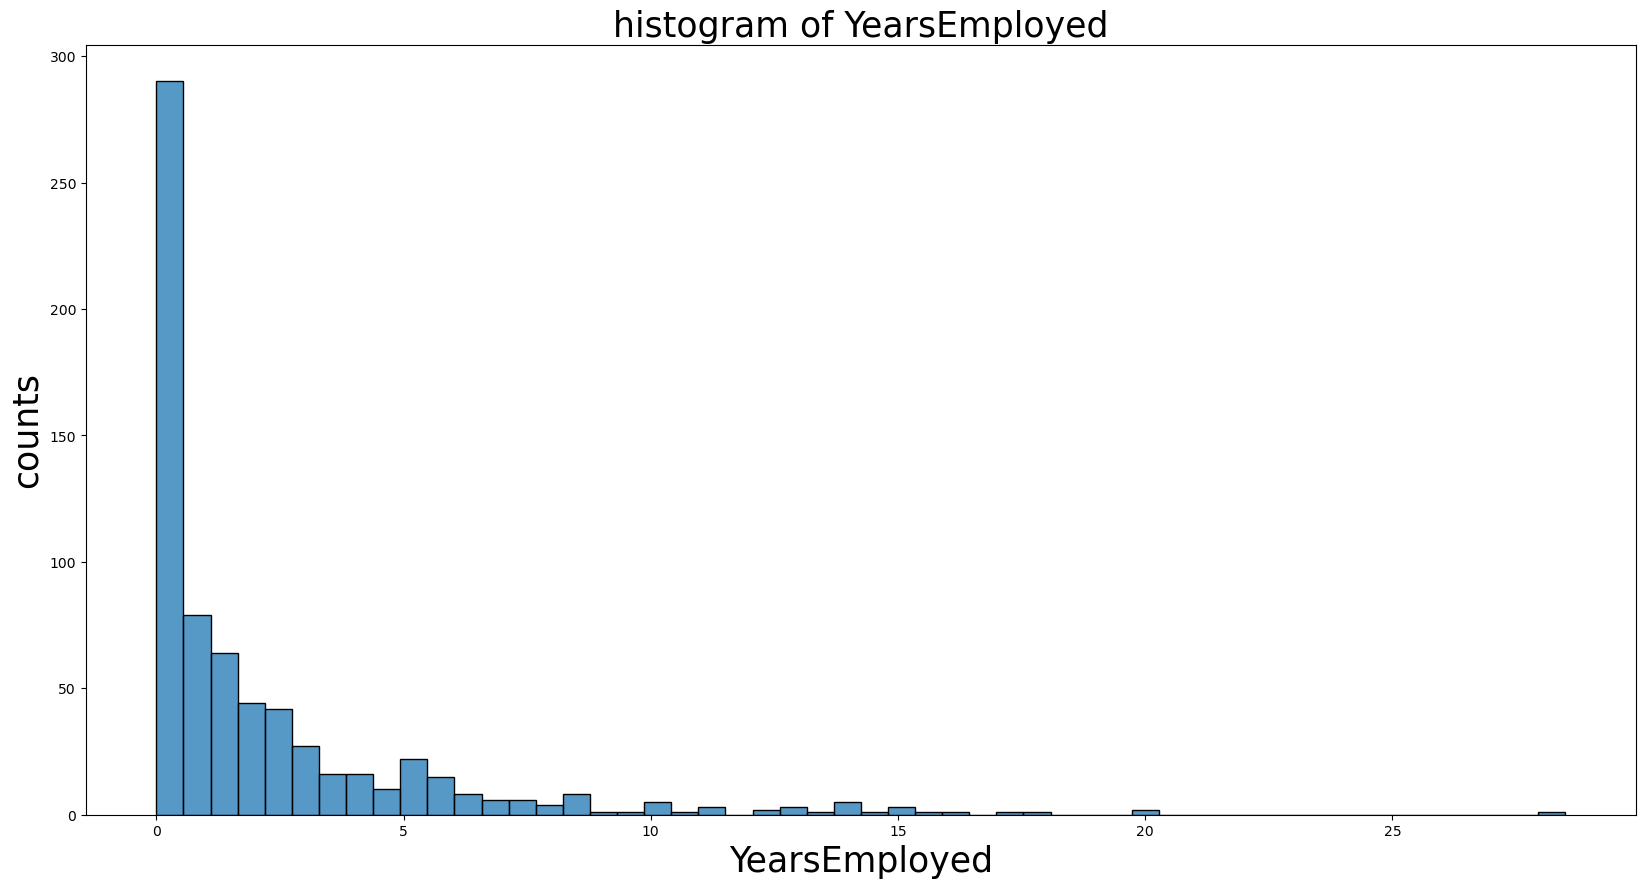

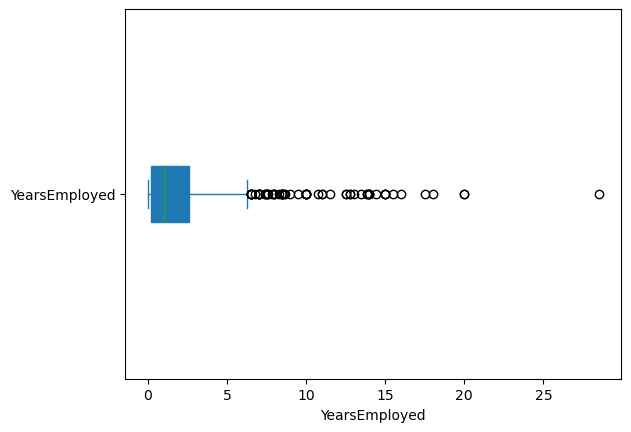

Debt:


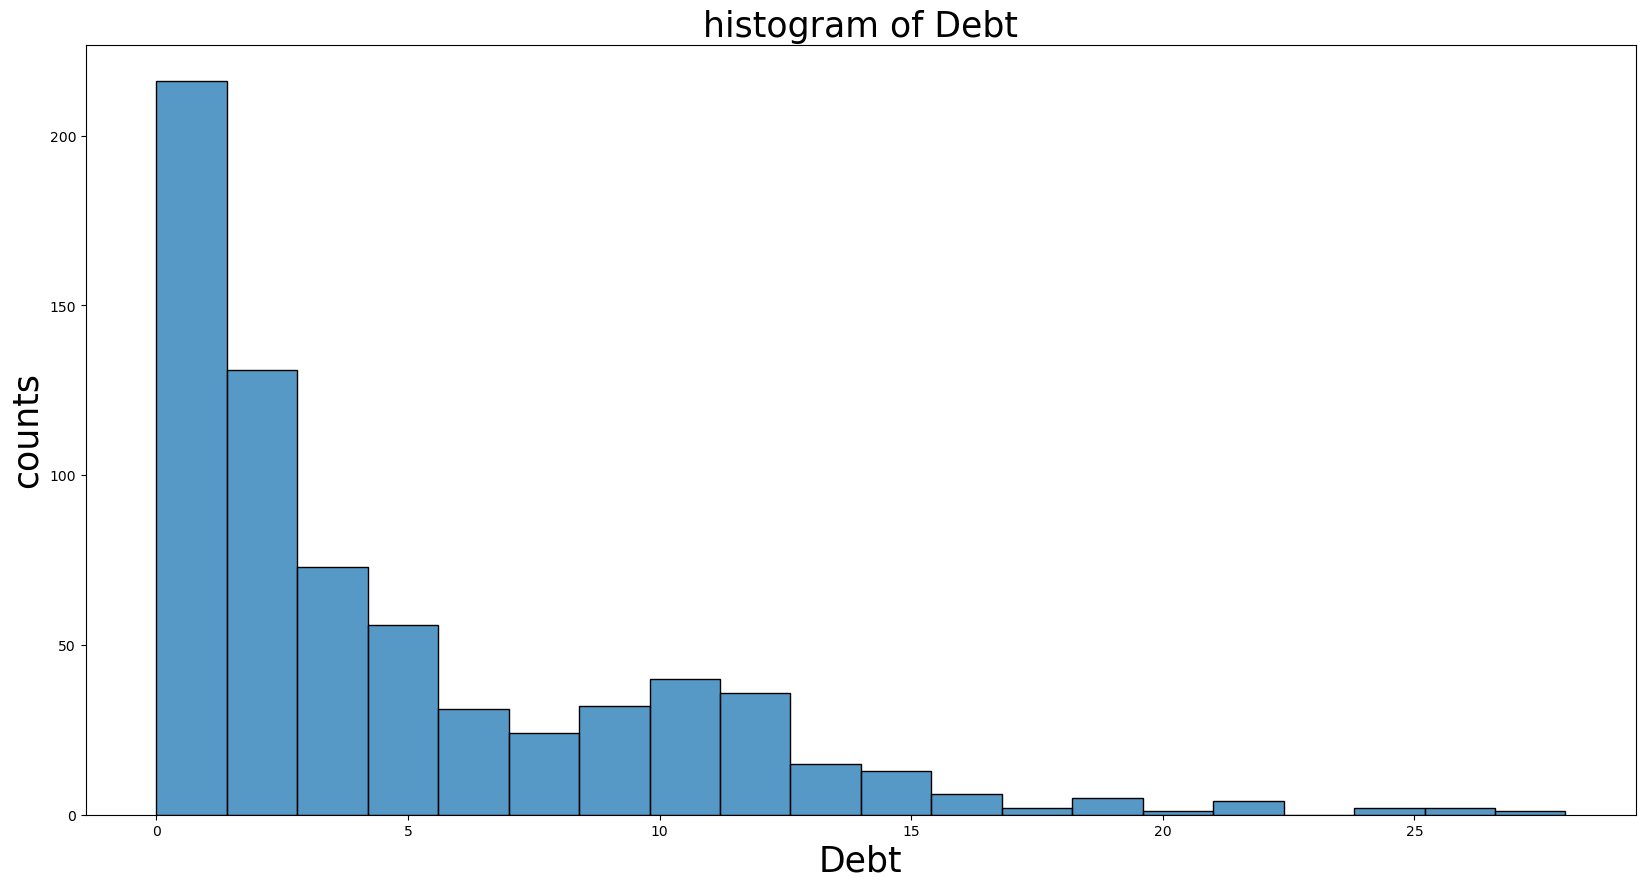

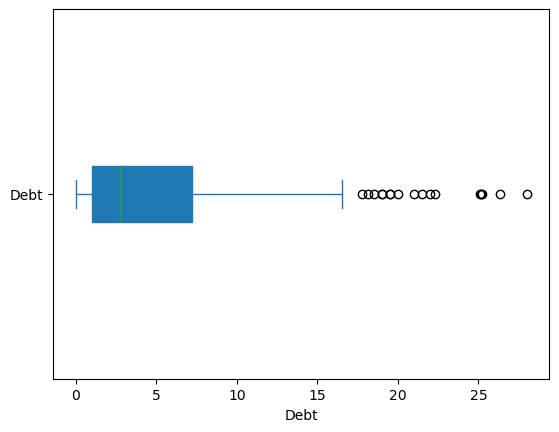

CreditScore:


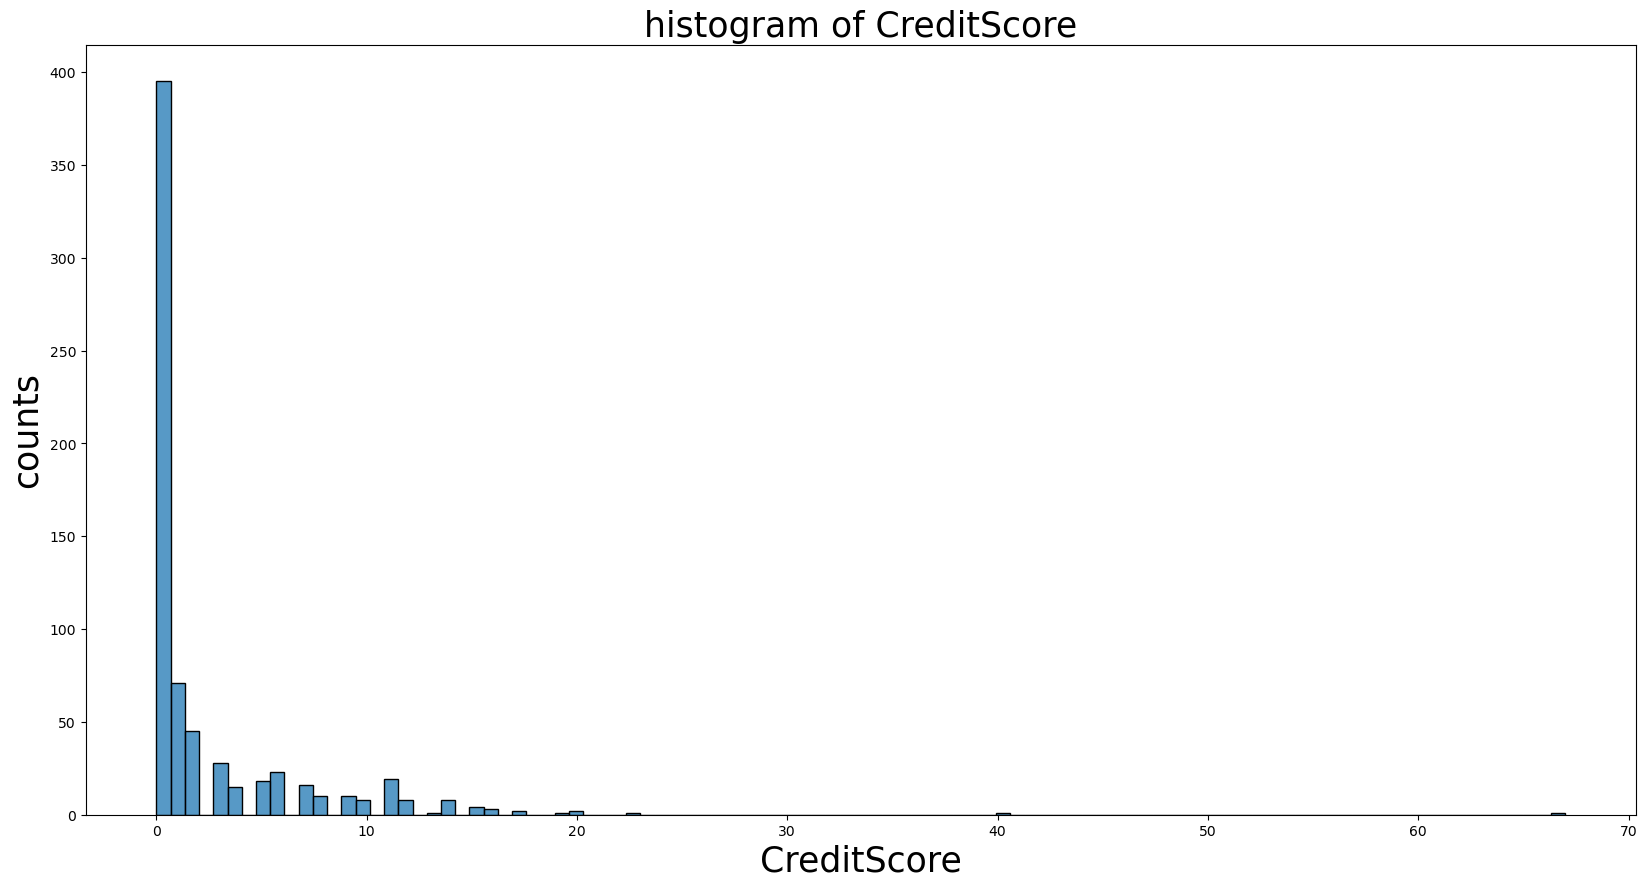

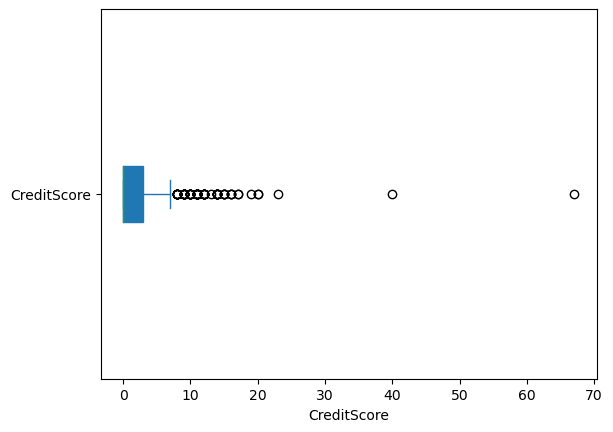

Age:


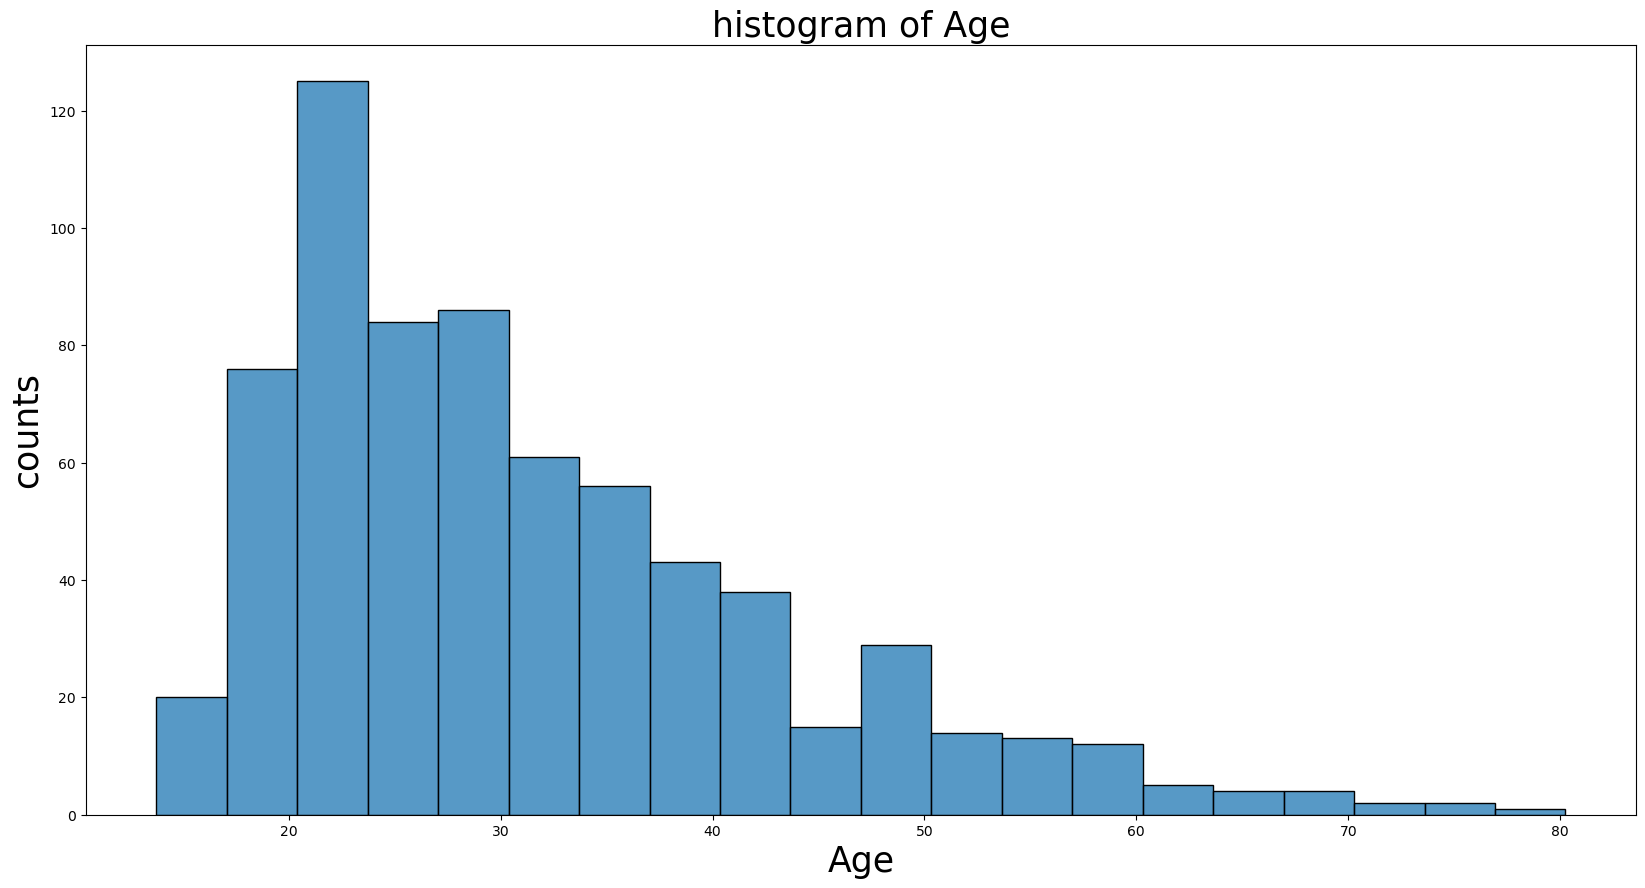

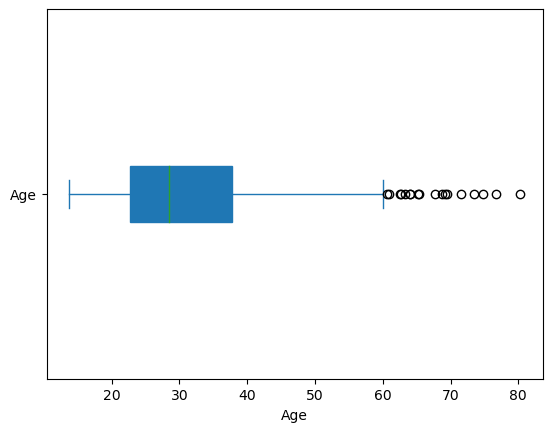

Income:


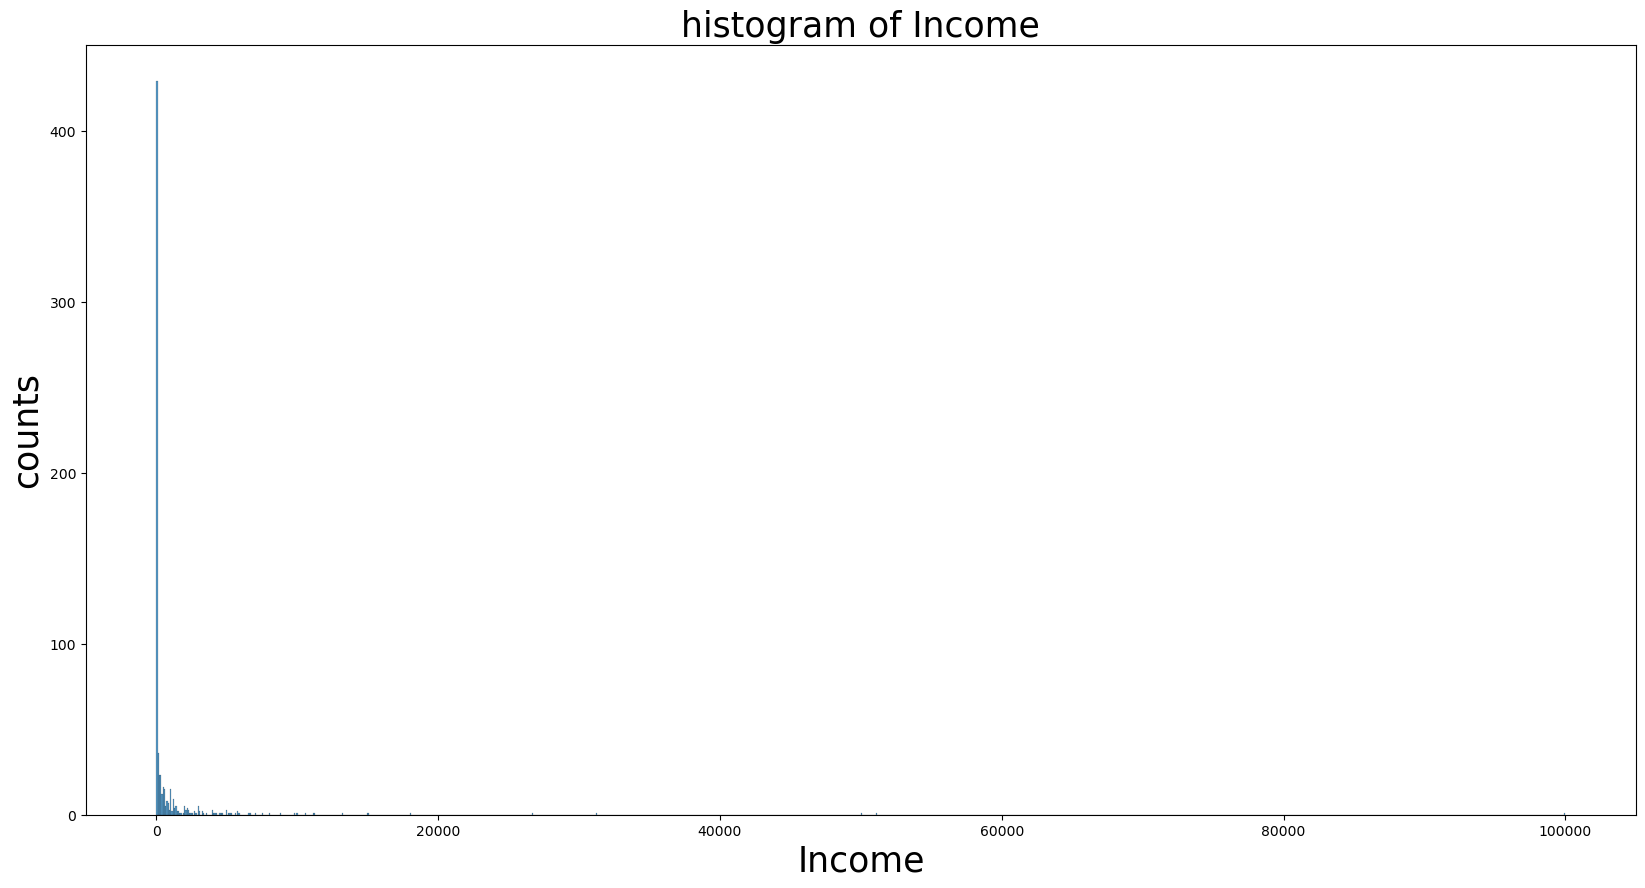

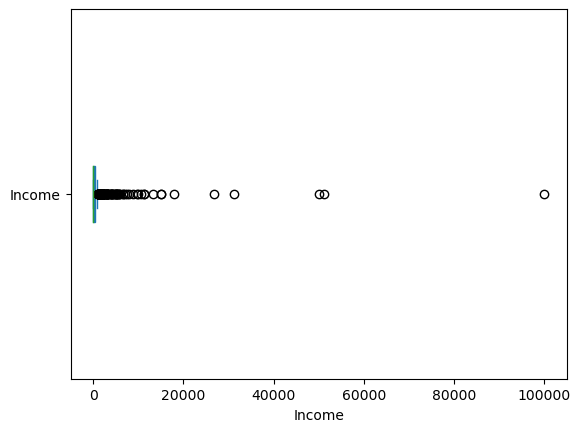

In [36]:
for i in continious:
    print(i+":")
    plt.figure(figsize=(20,10))
    sns.histplot(df[i])
    plt.xlabel(i, fontsize=25)
    plt.ylabel('counts', fontsize=25)
    plt.title('histogram of '+i, fontsize=25)
    plt.show()
    df[i].plot.box(vert=False,patch_artist=True)
    plt.xlabel(i)
    plt.show()

### Tratamos los Outliers

In [37]:
iqr=iqr

In [38]:
for i in continious:
    median = np.median(df[i])
    print(i,'median:',median)

YearsEmployed median: 1.0
Debt median: 2.75
CreditScore median: 0.0
Age median: 28.46
Income median: 5.0


YearsEmployed:


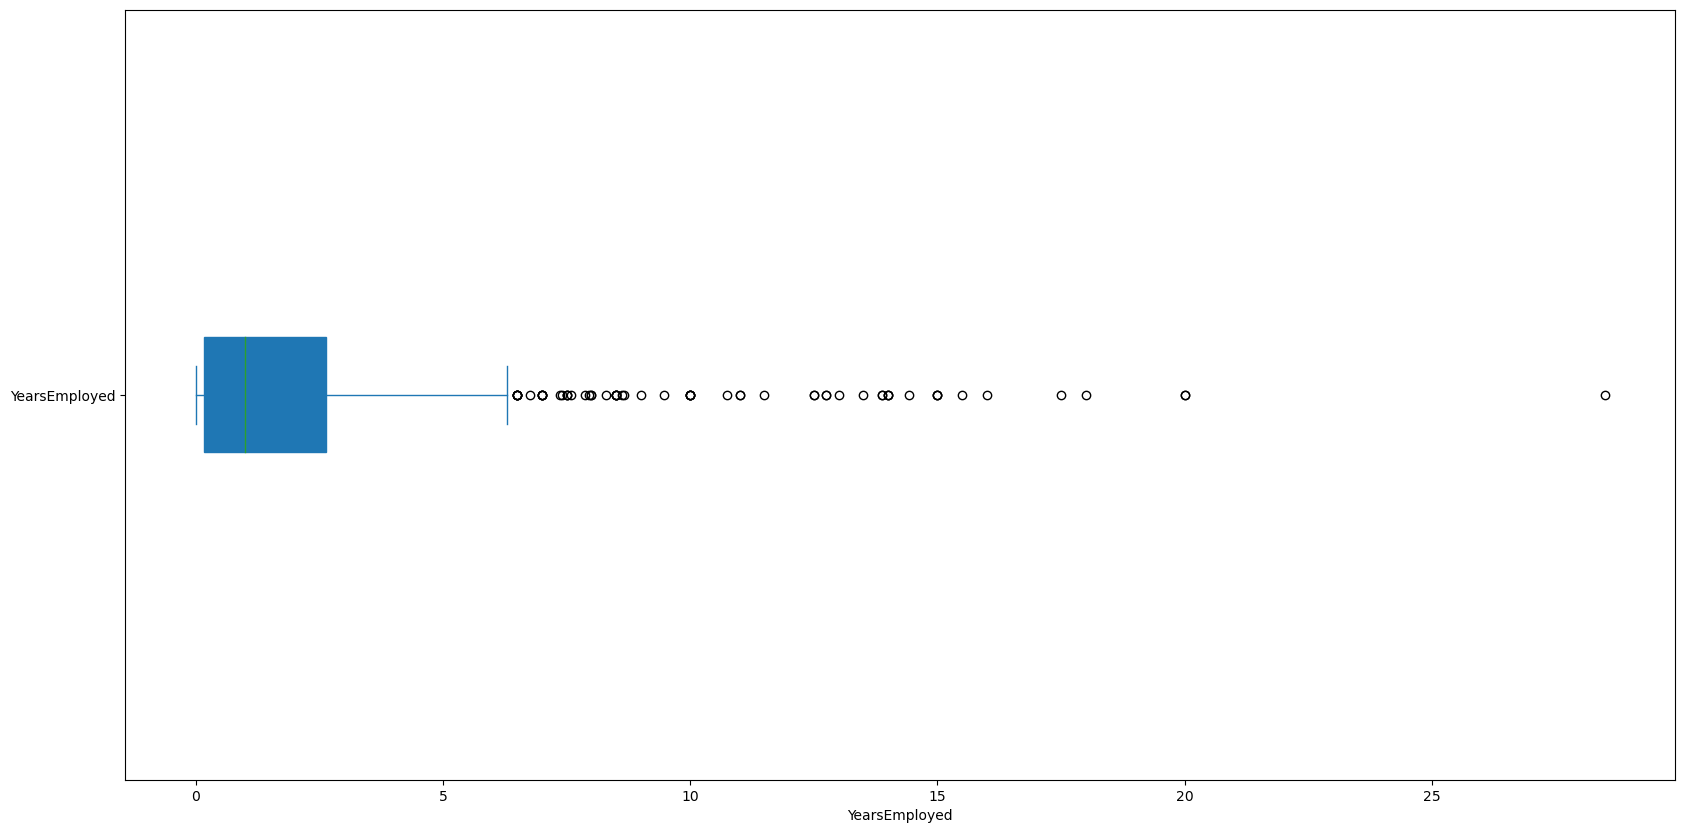

left limit:-3.525
right limit:6.3149999999999995
iqr:2.46
si hay outliers a la izquierda, escriba 'left', a la derecha, escriba 'right', en ambos, escriba 'both', si no hay outliers, escriba 'no'right
con que numero se va a reemplazar1


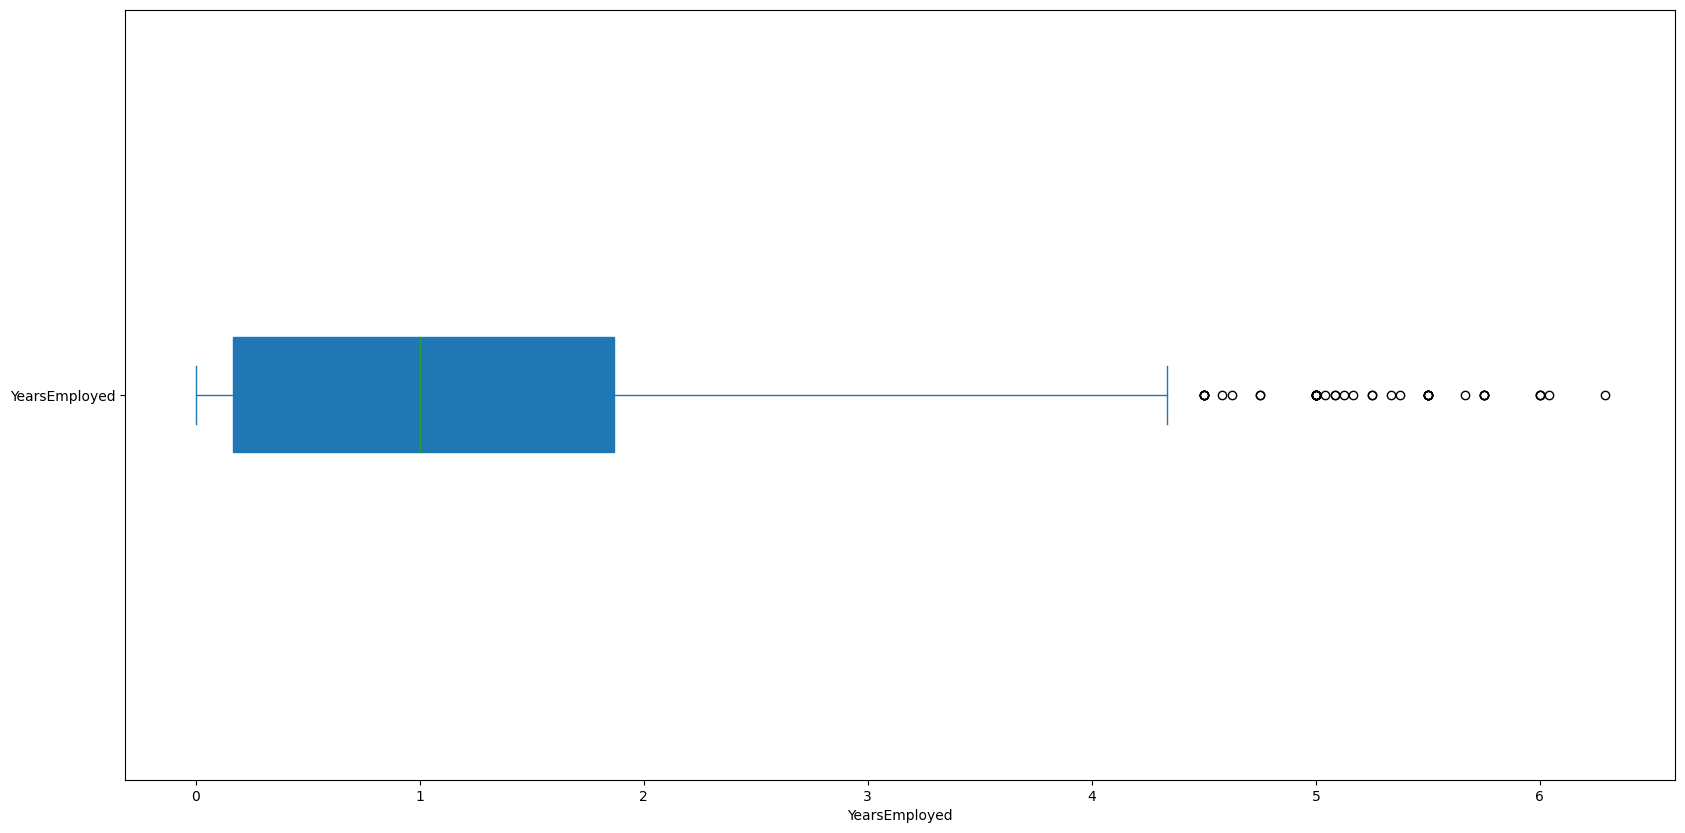

Debt:


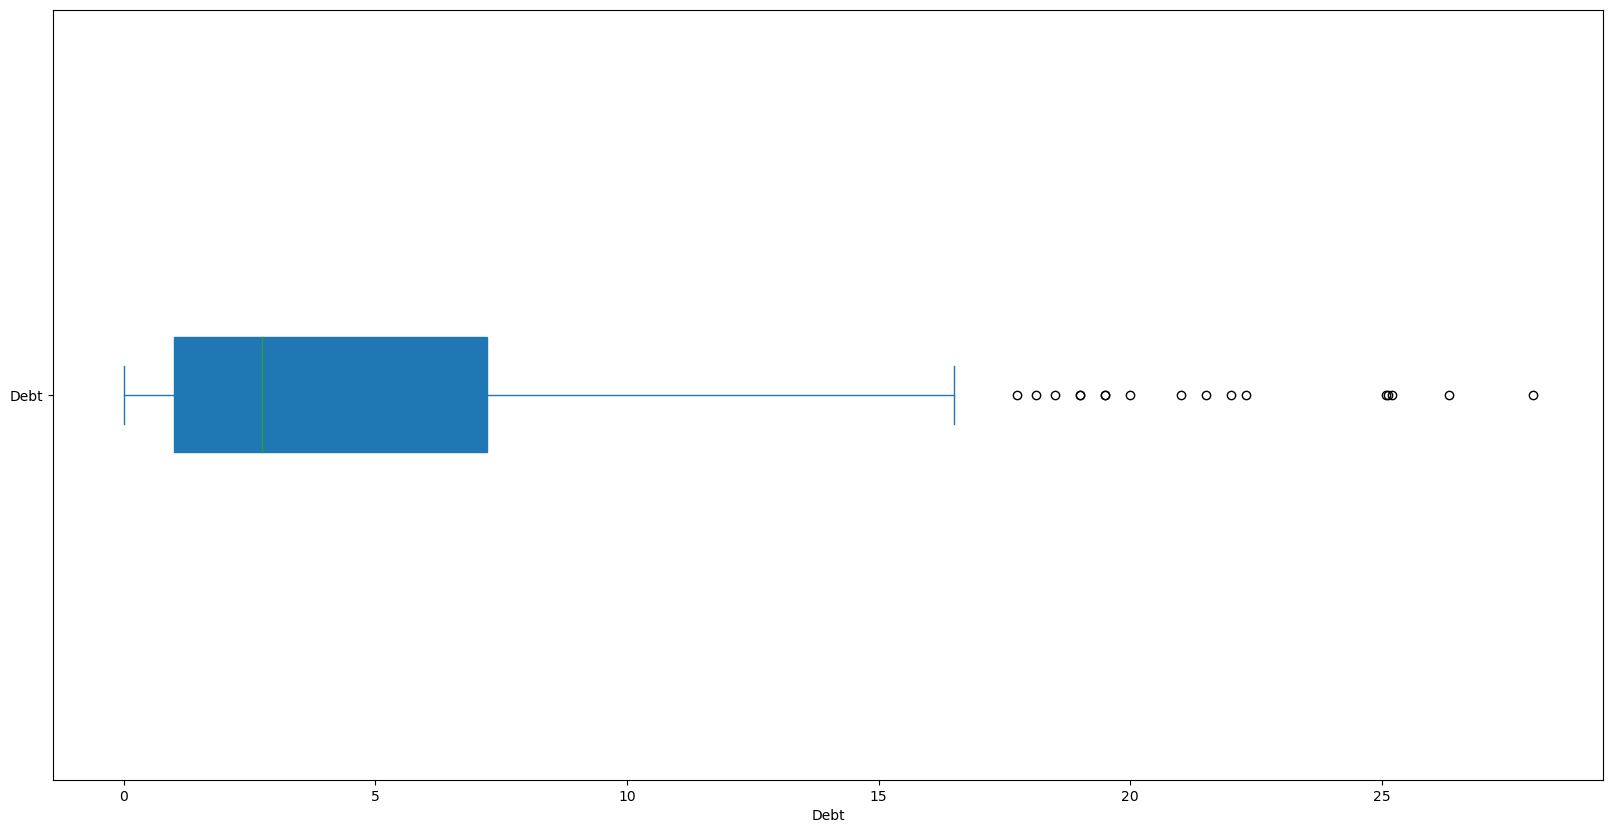

left limit:-8.31125
right limit:16.518749999999997
iqr:6.2075
si hay outliers a la izquierda, escriba 'left', a la derecha, escriba 'right', en ambos, escriba 'both', si no hay outliers, escriba 'no'right
con que numero se va a reemplazar2.75


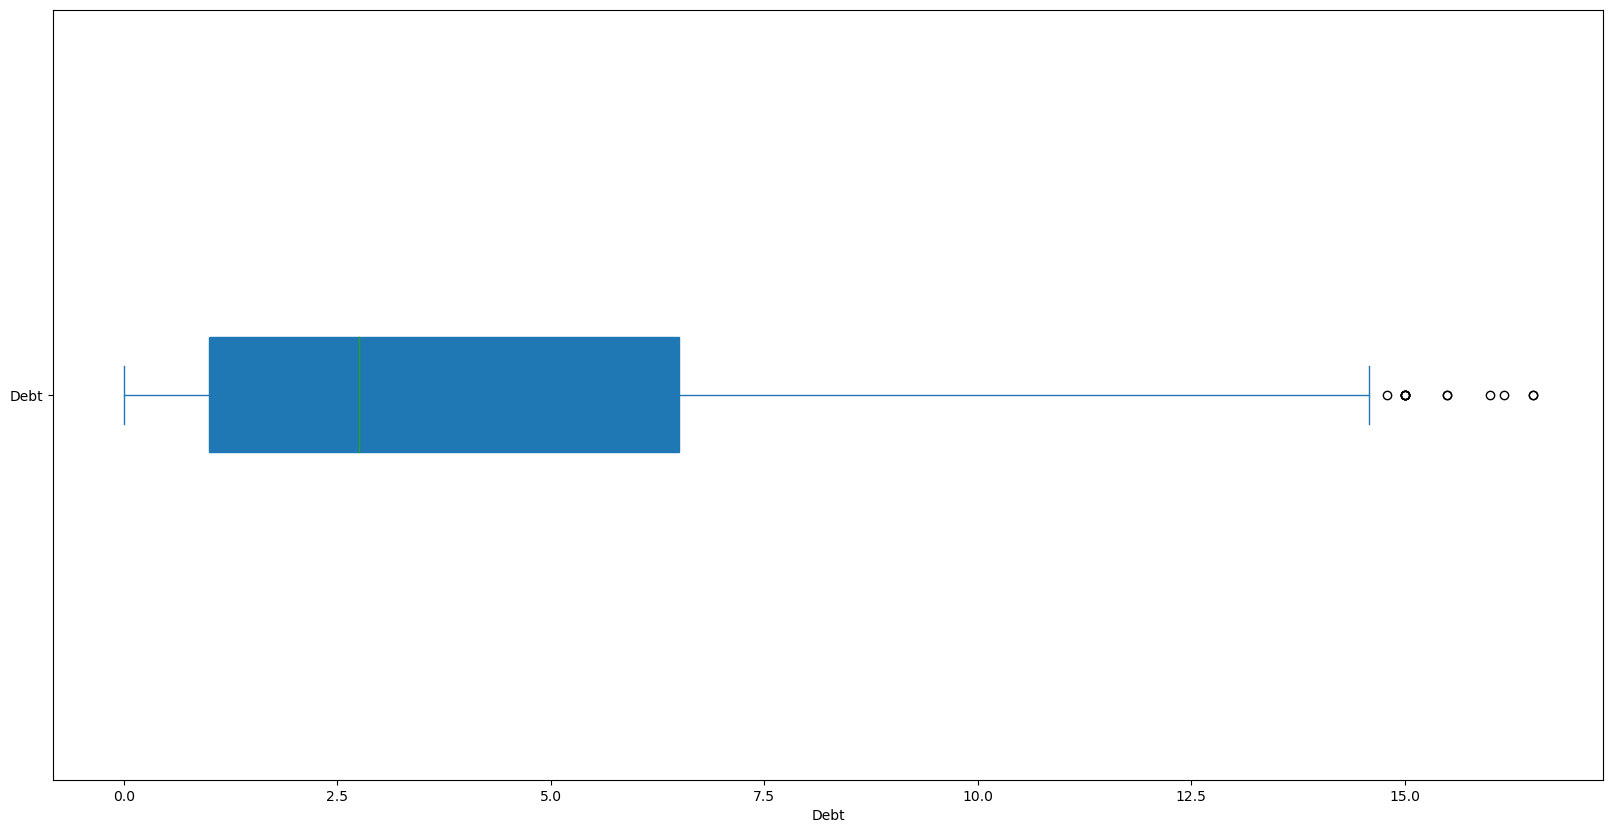

CreditScore:


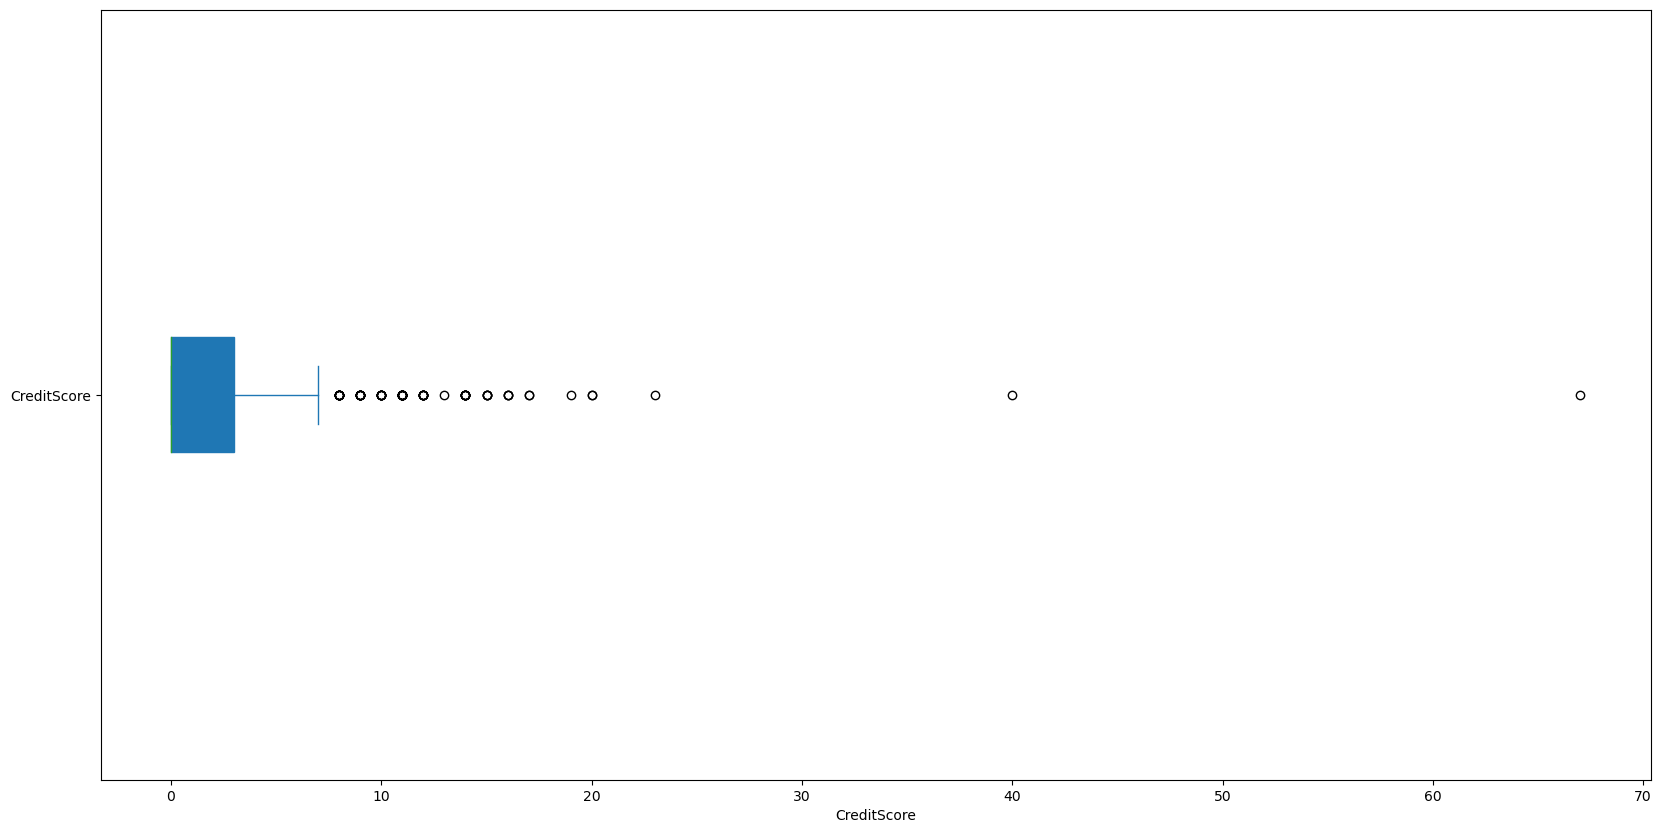

left limit:-4.5
right limit:7.5
iqr:3.0
si hay outliers a la izquierda, escriba 'left', a la derecha, escriba 'right', en ambos, escriba 'both', si no hay outliers, escriba 'no'right
con que numero se va a reemplazar0


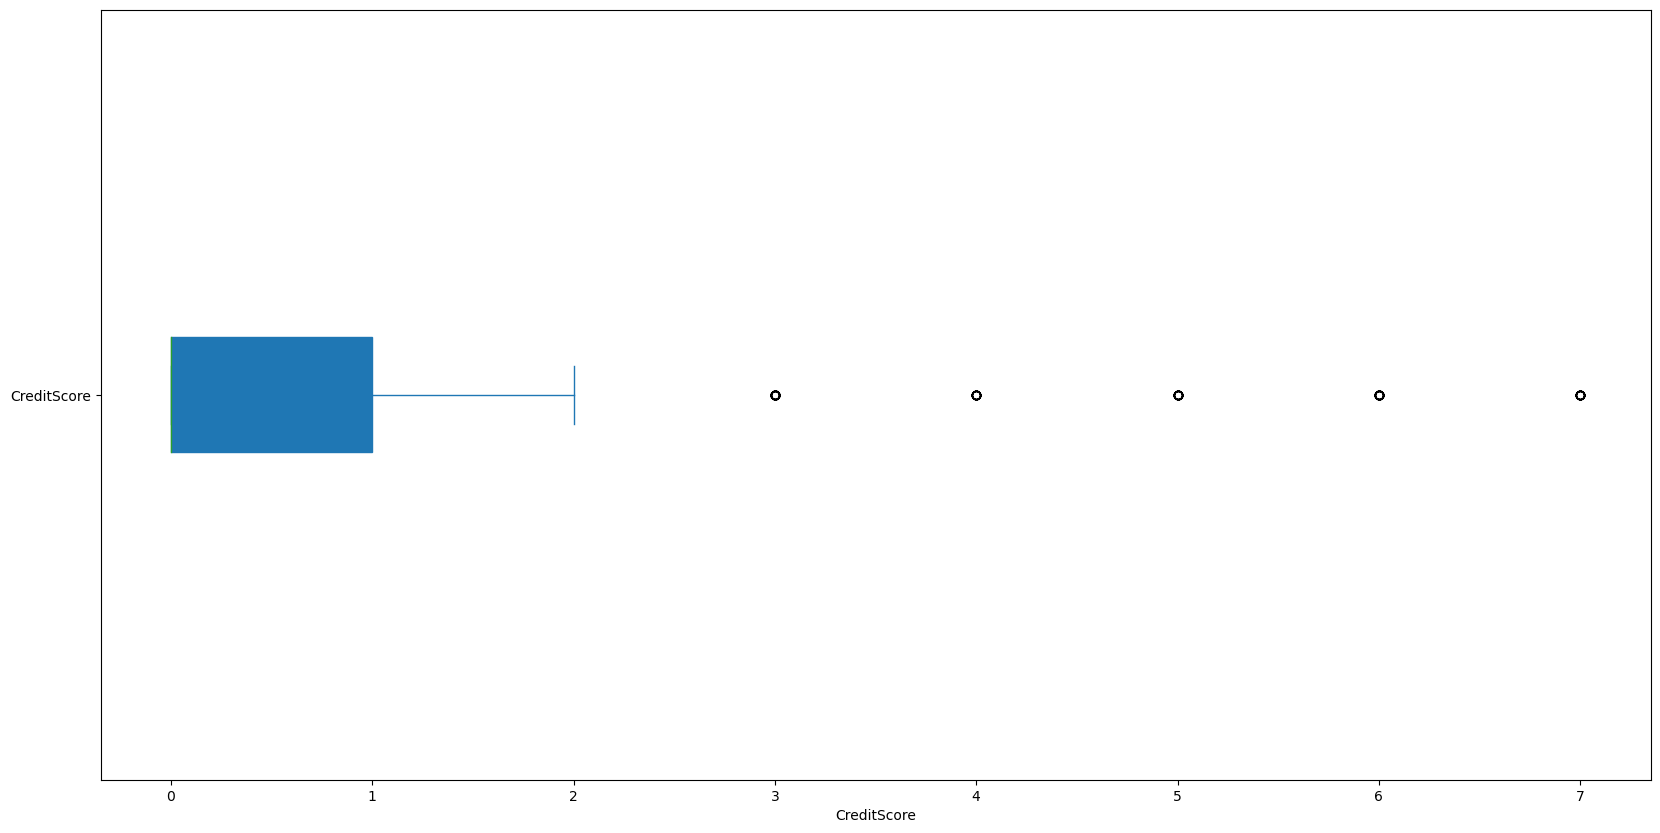

Age:


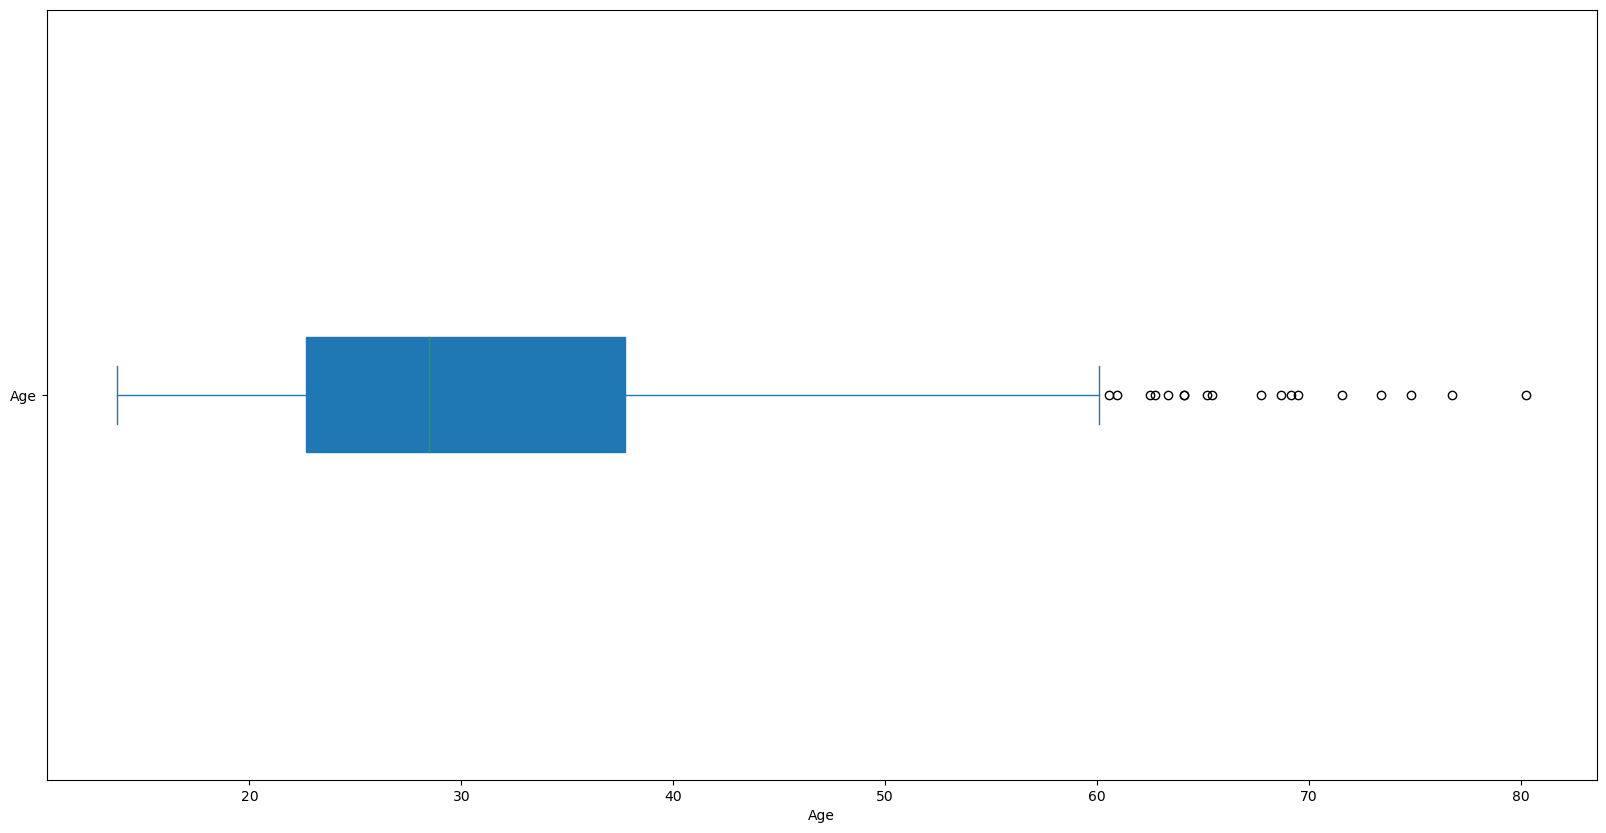

left limit:0.11375000000001023
right limit:60.26374999999999
iqr:15.037499999999994
si hay outliers a la izquierda, escriba 'left', a la derecha, escriba 'right', en ambos, escriba 'both', si no hay outliers, escriba 'no'right
con que numero se va a reemplazar28.46


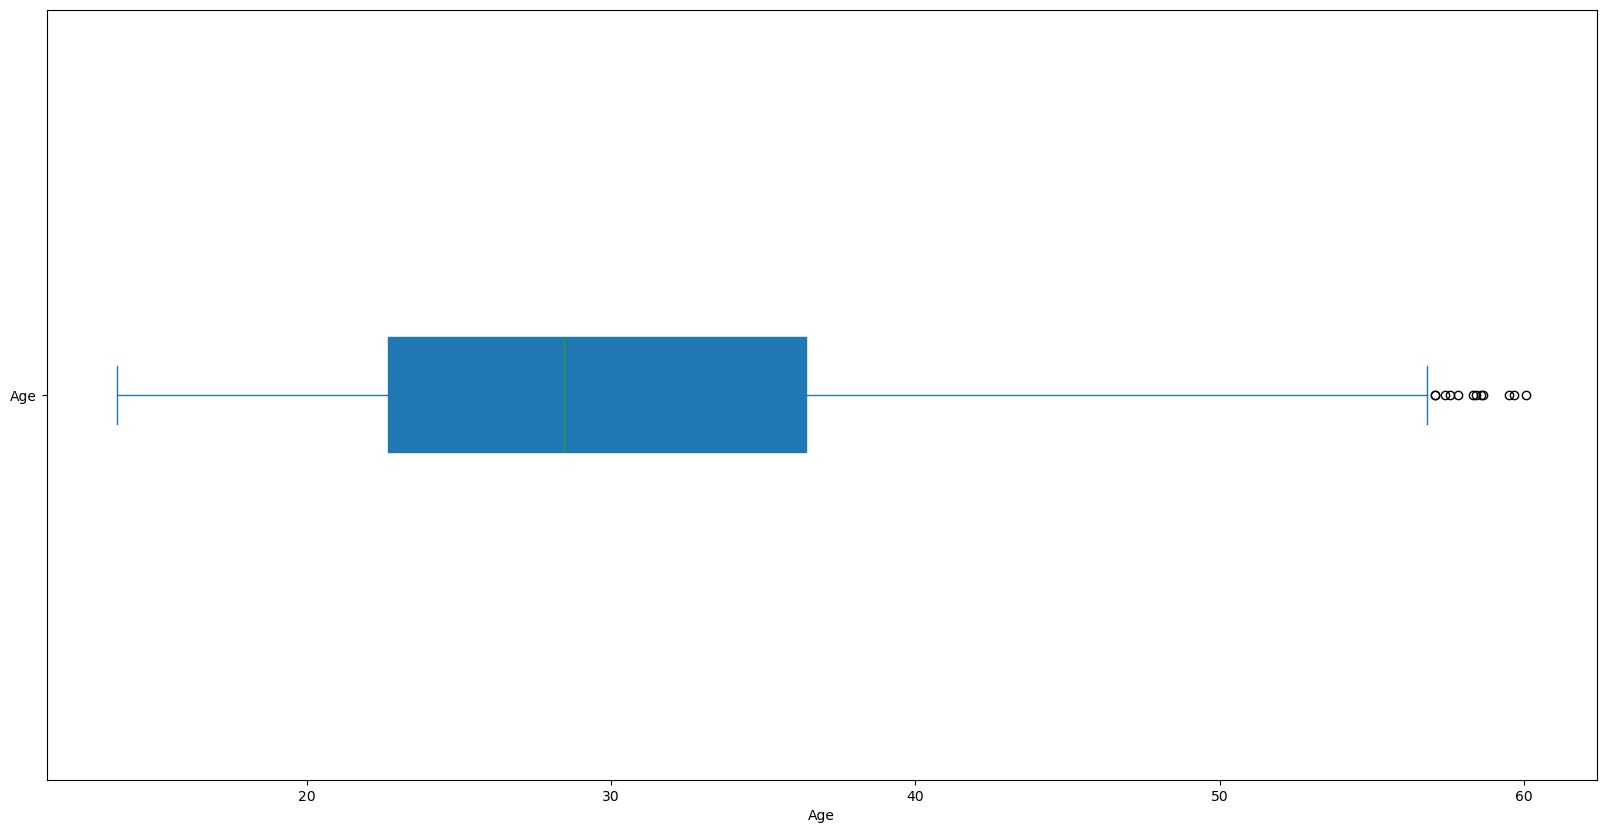

Income:


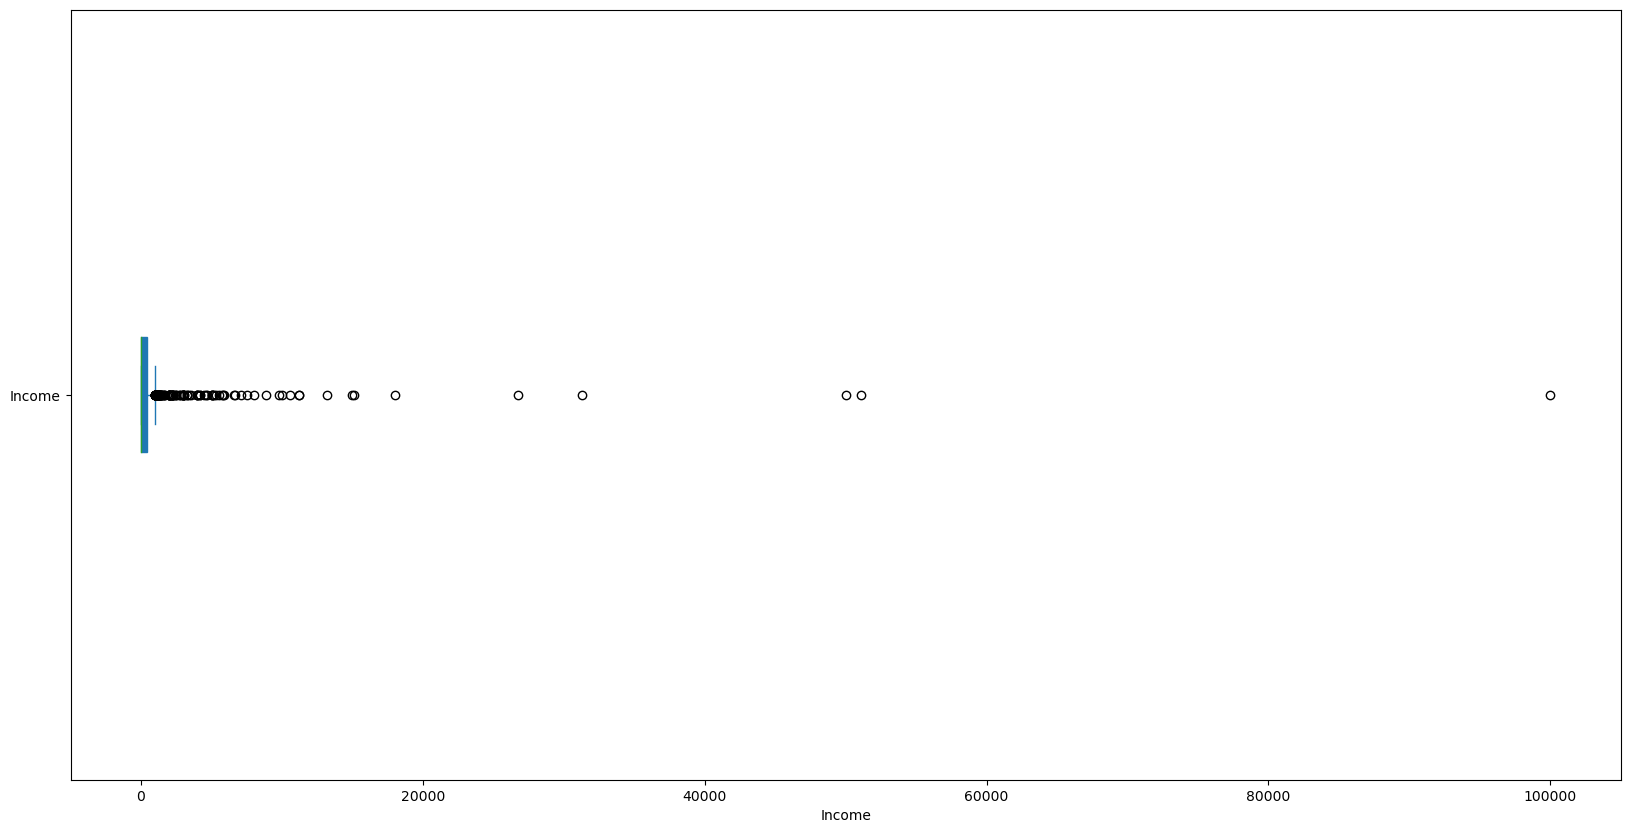

left limit:-593.25
right limit:988.75
iqr:395.5
si hay outliers a la izquierda, escriba 'left', a la derecha, escriba 'right', en ambos, escriba 'both', si no hay outliers, escriba 'no'right
con que numero se va a reemplazar5


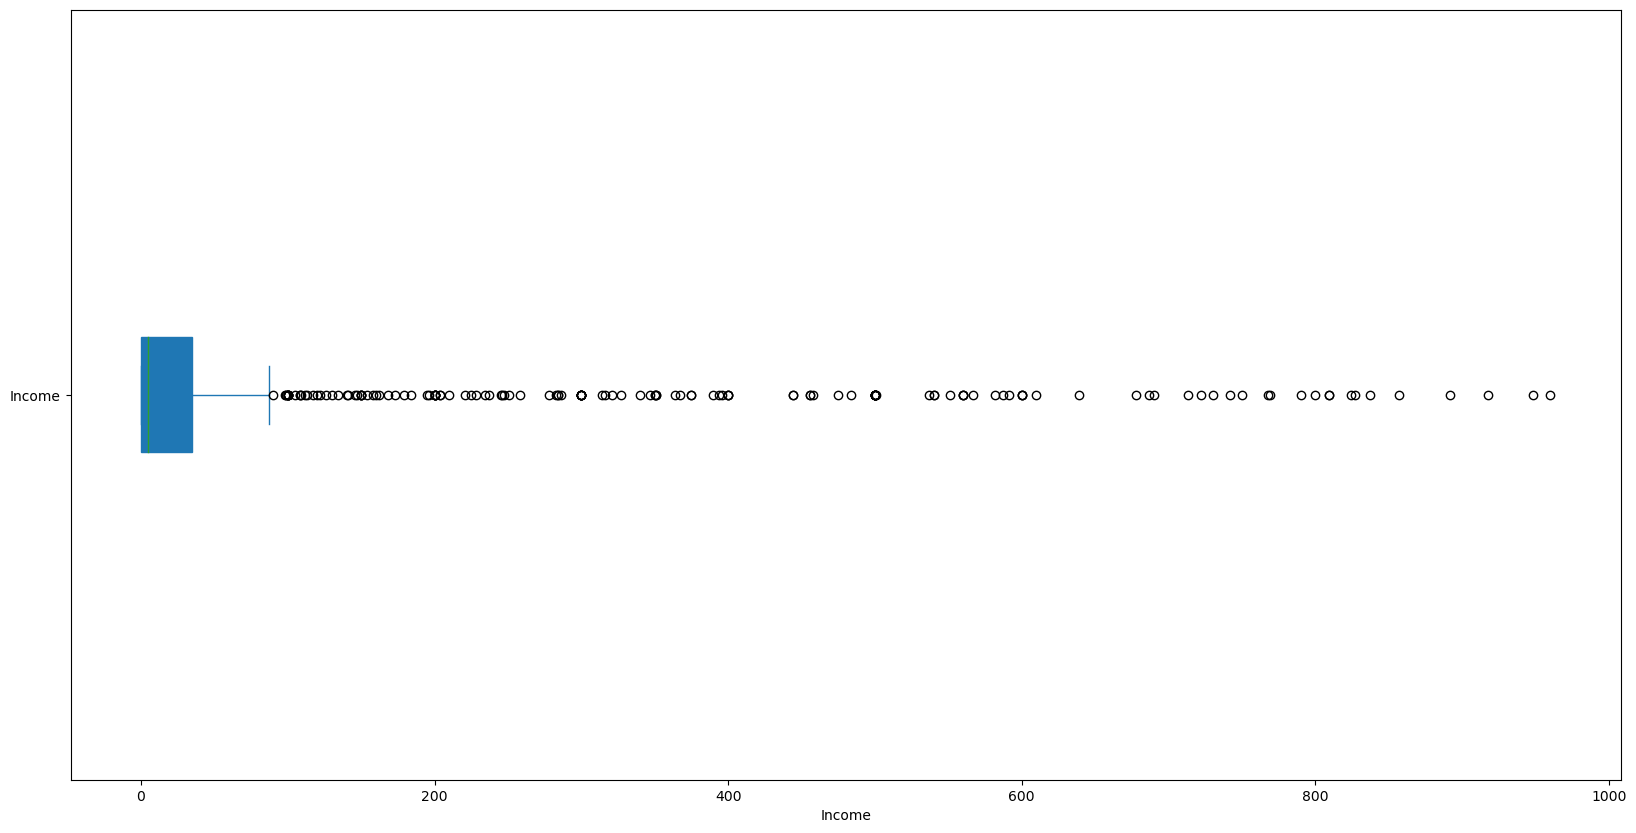

In [39]:
for i in continious:
    print(i+":")
    plt.figure(figsize=(20,10))
    df[i].plot.box(vert=False,patch_artist=True)
    plt.xlabel(i)
    plt.show()
    
    iqr= df[i].describe()['75%']-df[i].describe()['25%']
    right_lim=df[i].quantile(0.75)+1.5*iqr
    leftt_lim=df[i].quantile(0.25)-1.5*iqr
    print("left limit:{}".format(leftt_lim))
    print("right limit:{}".format(right_lim))
    print("iqr:{}".format(iqr))

    a=input("si hay outliers a la izquierda, escriba 'left', a la derecha, escriba 'right', en ambos, escriba 'both', si no hay outliers, escriba 'no'")
    a=a.lower()
    if a=='left':
        lo=float(input('con que numero se va a reemplazar'))
        df[i]=[lo if val<leftt_lim else val for val in df[i]]
    elif a=='right':
        ro=float(input('con que numero se va a reemplazar'))
        df[i]=[ro if val>right_lim else val for val in df[i]]
    elif a=='both':
        lo=float(input('con que numero se va a reemplazar'))
        ro=float(input('con que numero se va a reemplazar'))
        df[i]=[ro if val>right_lim else val for val in df[i]]
        df[i]=[lo if val<leftt_lim else val for val in df[i]]
    elif a=='no':
        pass
    plt.figure(figsize=(20,10))
    df[i].plot.box(vert=False,patch_artist=True)
    plt.xlabel(i,)
    plt.show()

YearsEmployed:


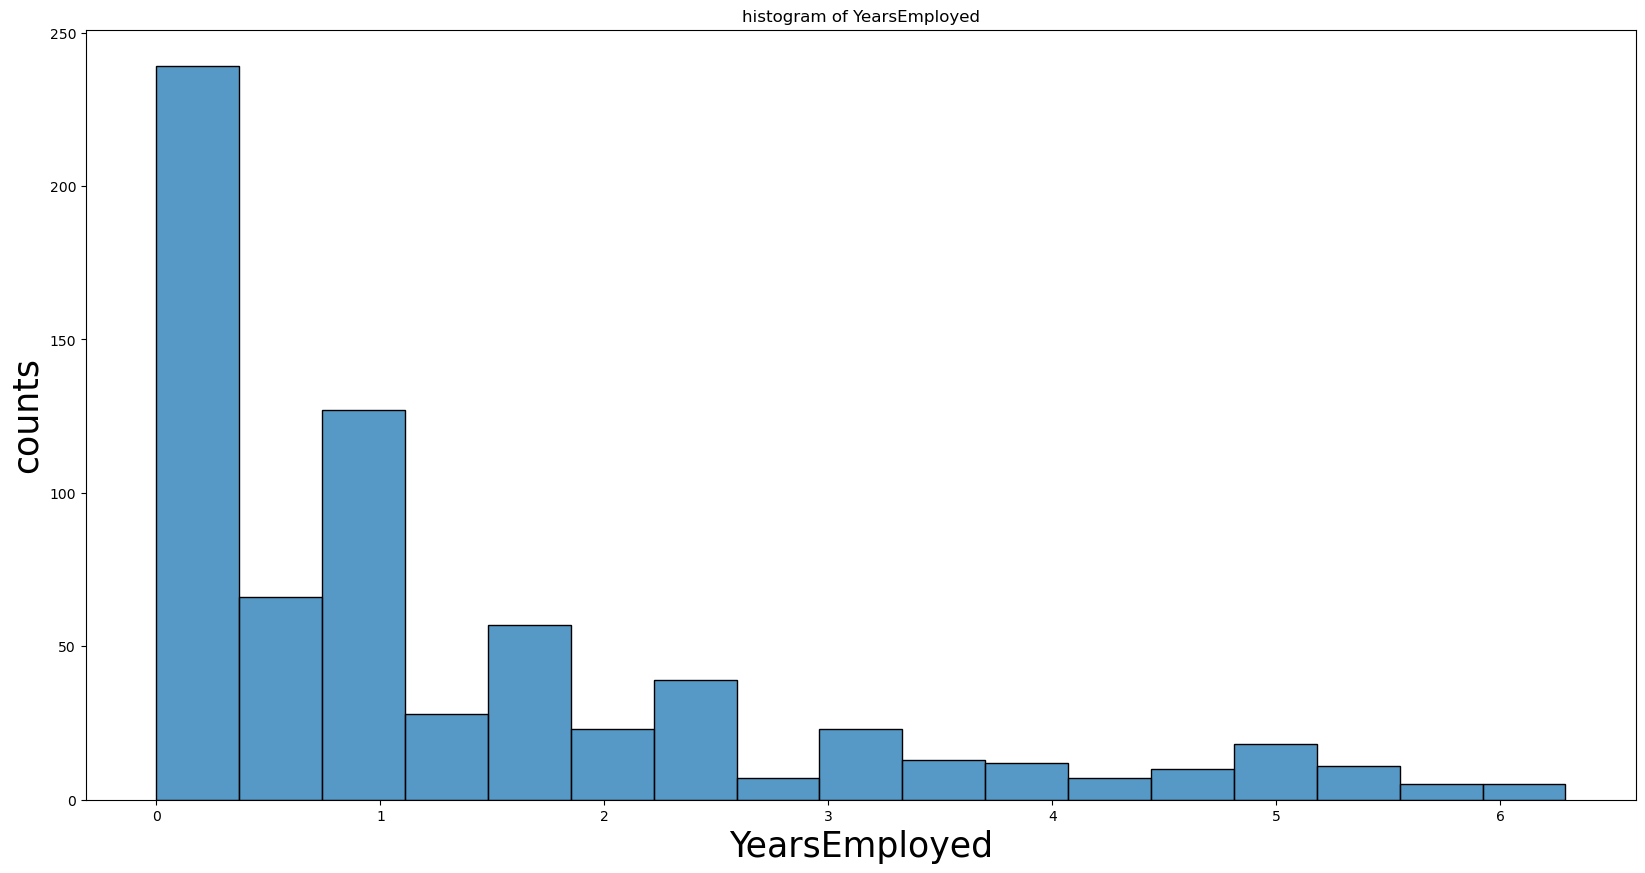

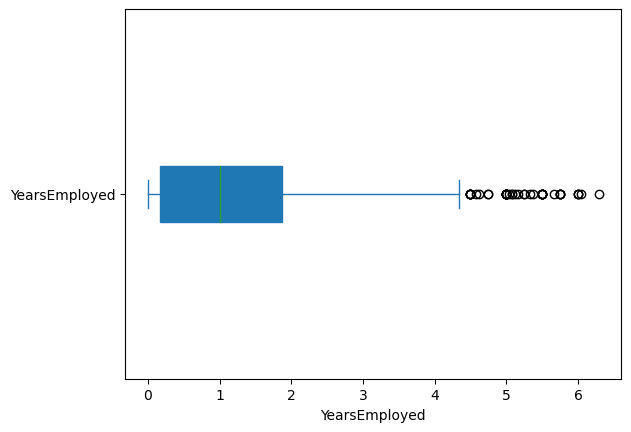

Debt:


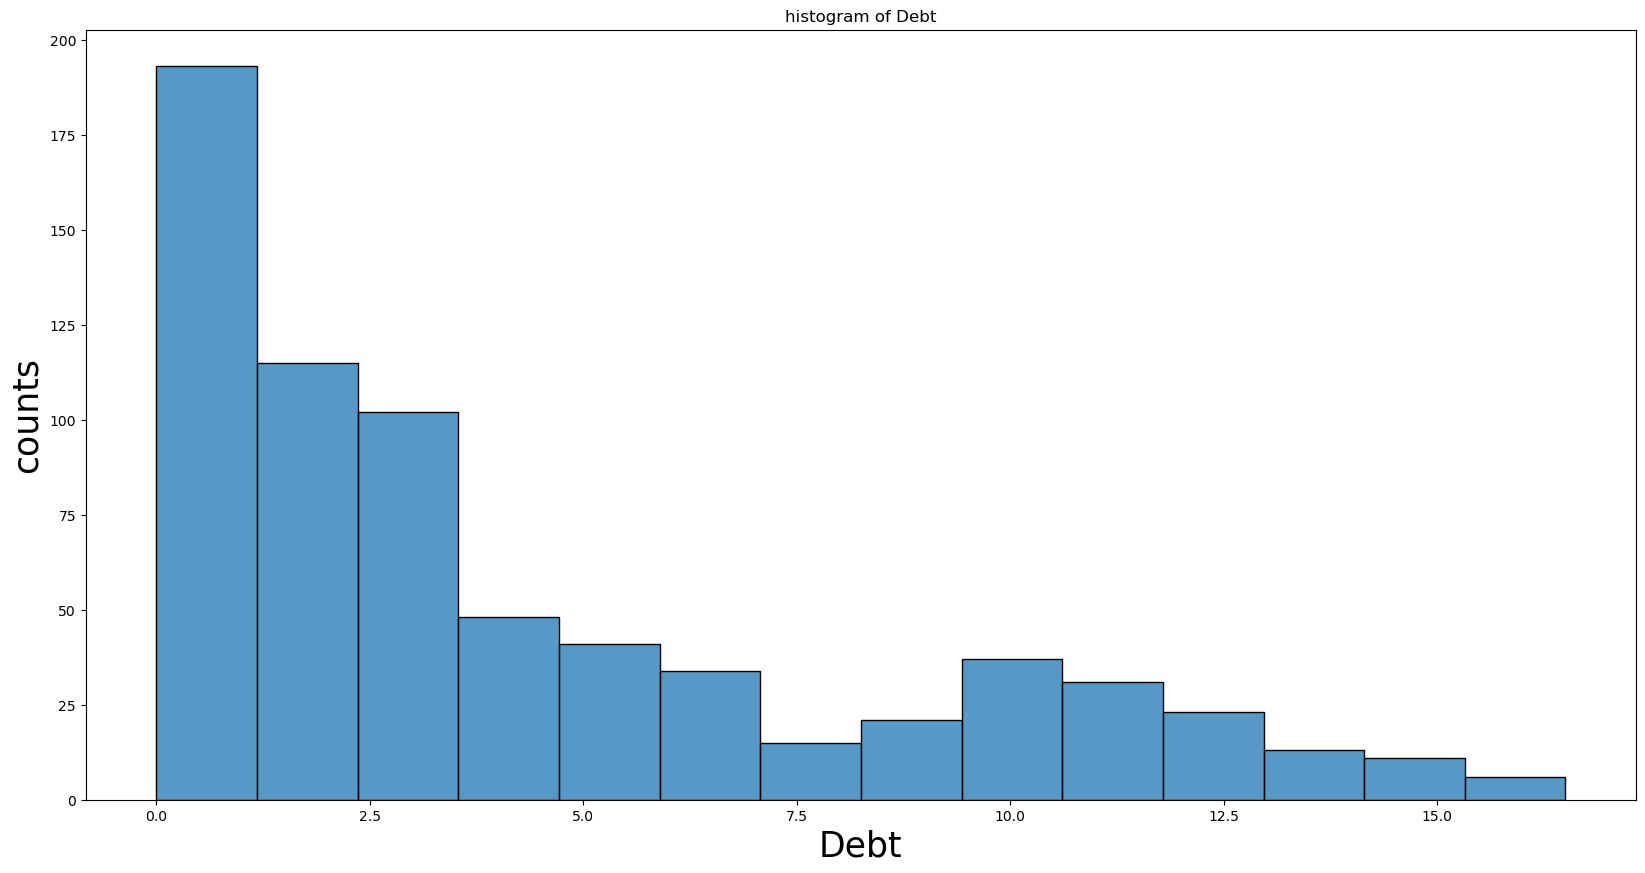

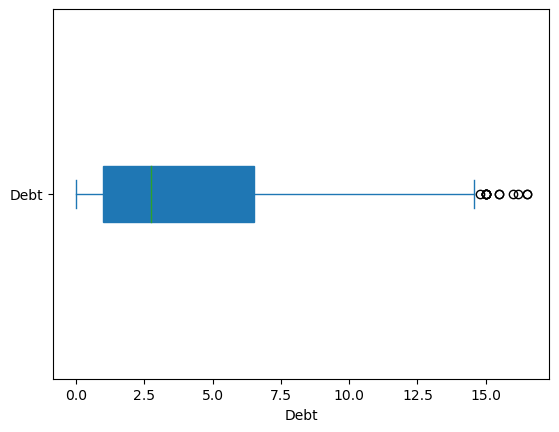

CreditScore:


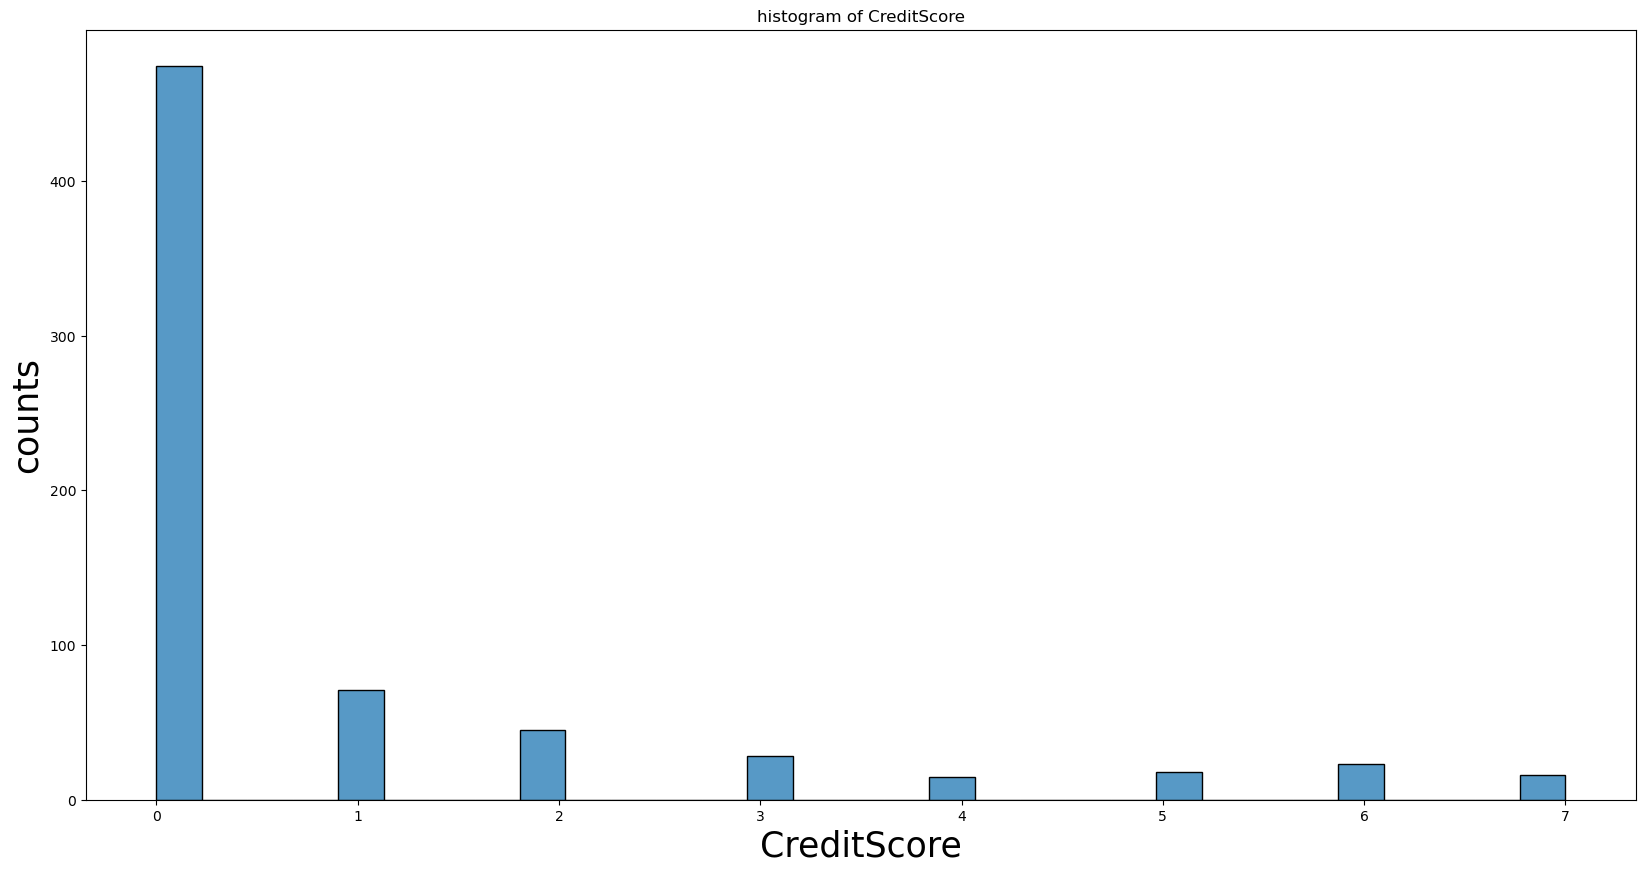

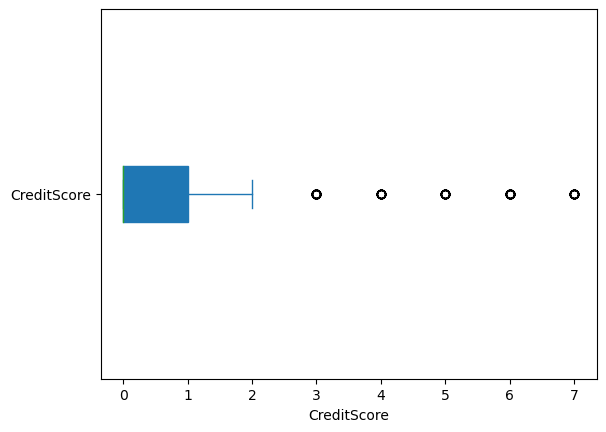

Age:


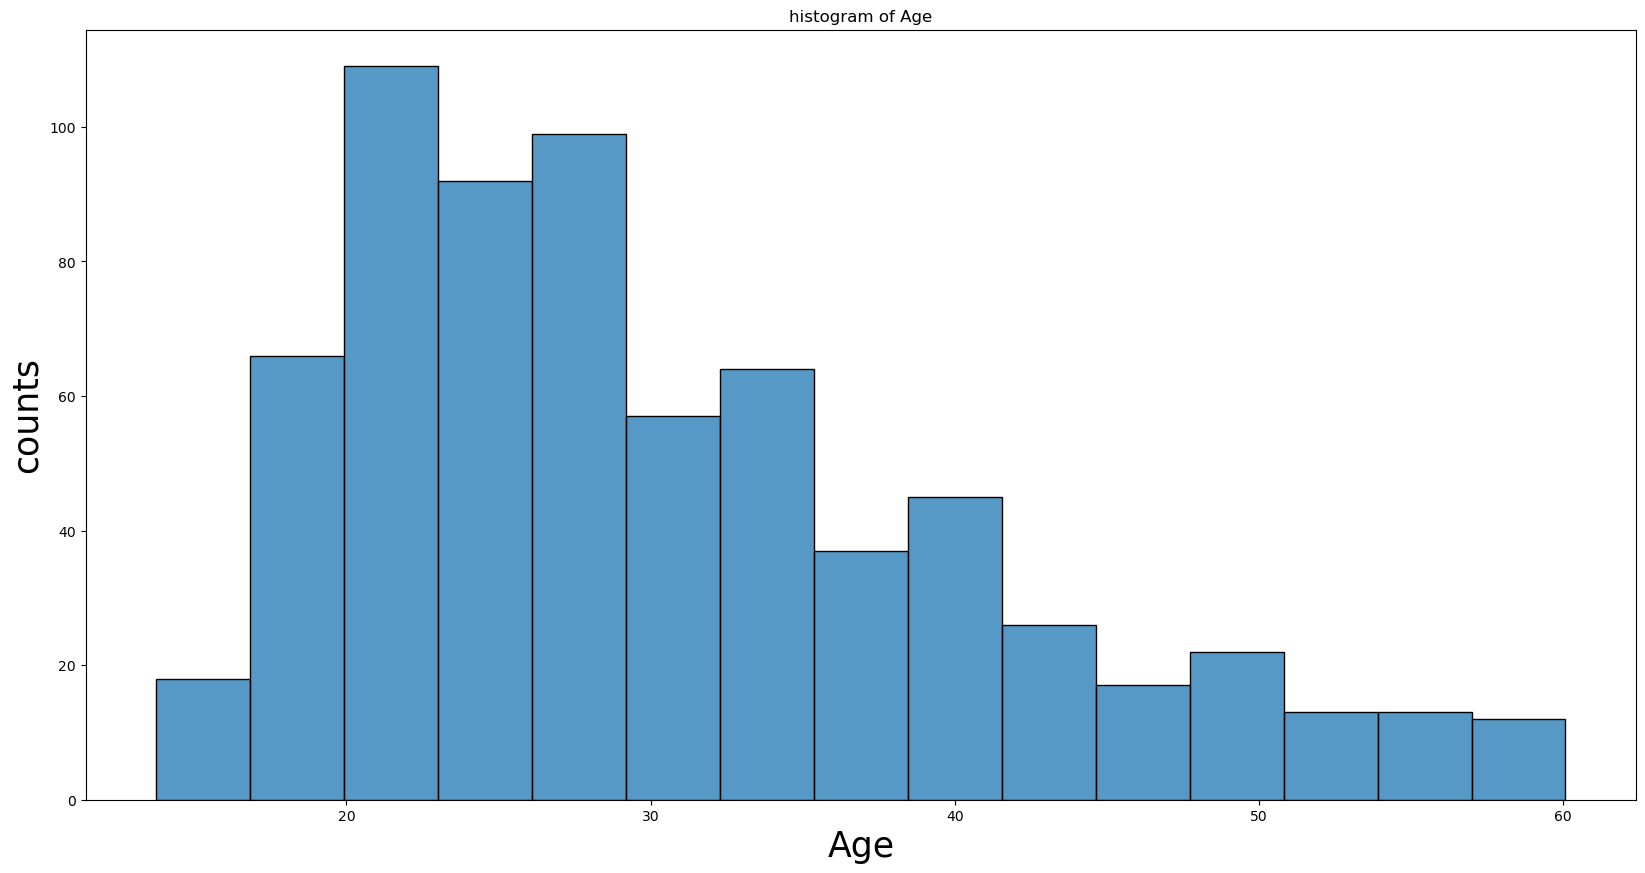

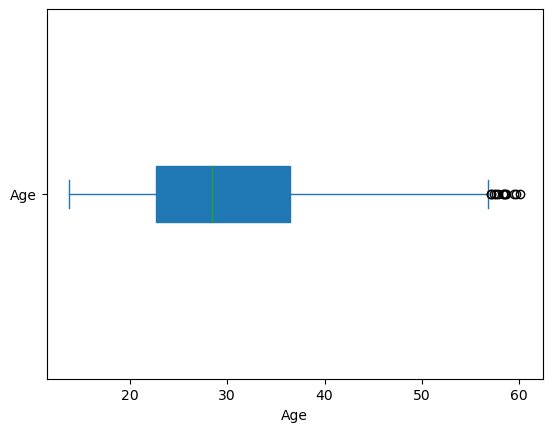

Income:


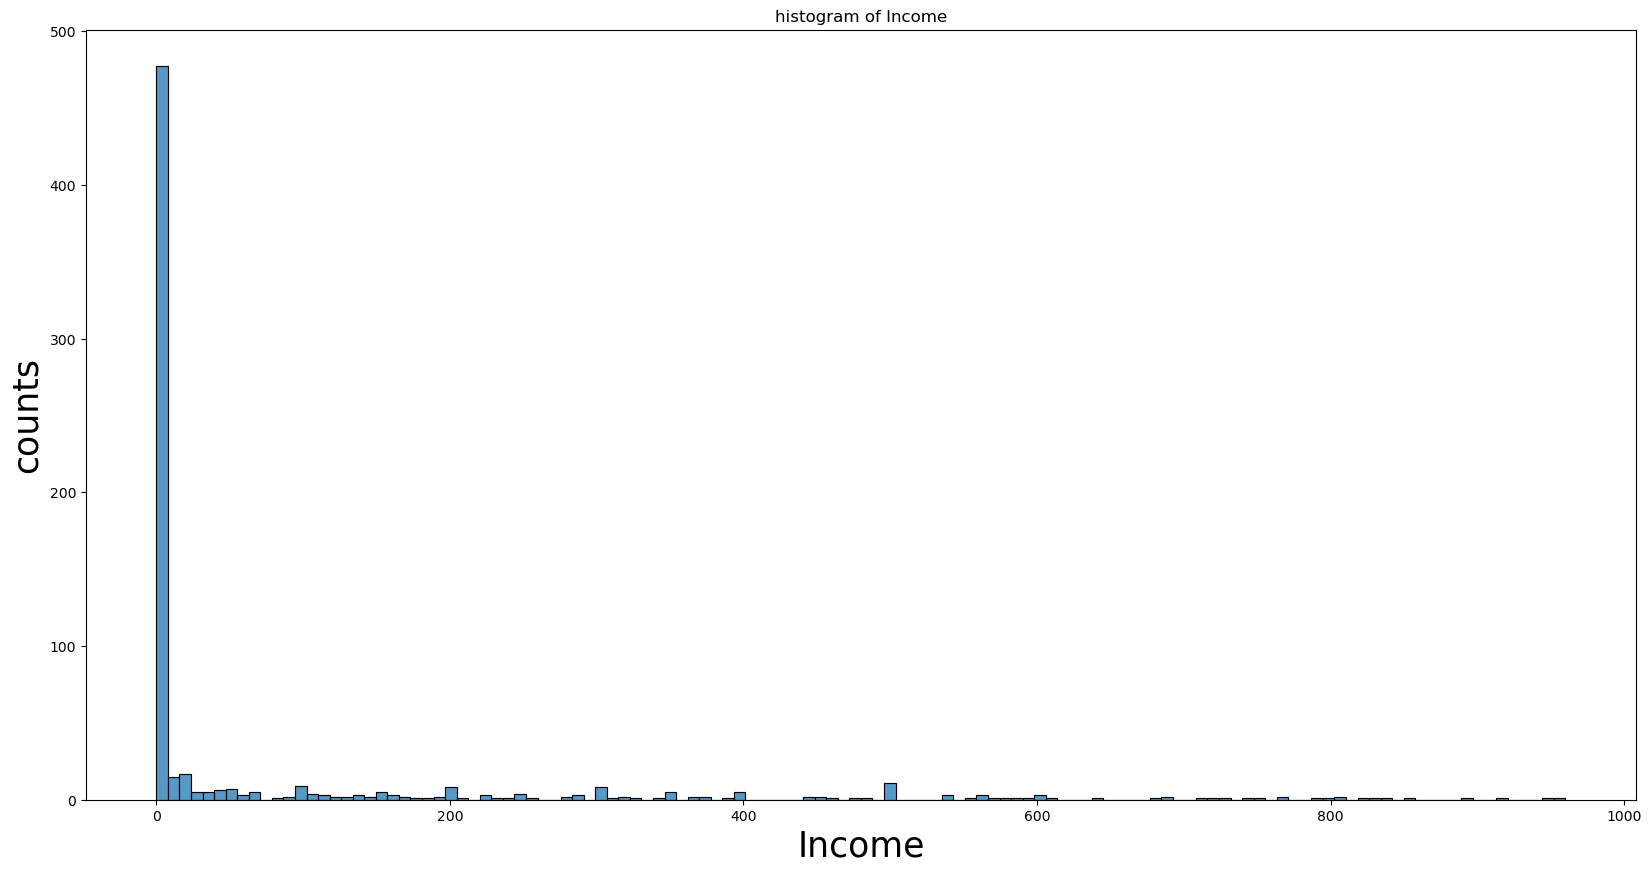

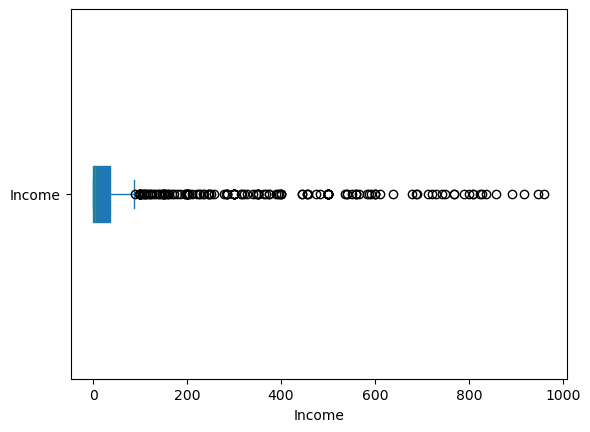

In [40]:
for i in continious:
    print(i+":")
    plt.figure(figsize=(20,10))
    sns.histplot(df[i])
    plt.xlabel(i, fontsize=25)
    plt.ylabel('counts', fontsize=25)
    plt.title('histogram of '+i)
    plt.show()
    df[i].plot.box(vert=False,patch_artist=True)
    plt.xlabel(i)
    plt.show()

### Realizamos el modelo de clasificación:

En base al analisis anterior y a los p_values caluculados nos quedmos con las siguientes variables y analizaremos distintas combinaciones de ellas

- CreditScore
- BankCustomer
- Married
- PriorDefault
- Employed
- YearsEmployed

### Overfitting & Underfitting

Utilizando un modelo de clasificación estudiamos los casos de overfitting y underfitting y elegimos la cantidad de variables que mejor funcionan en nuestro modelo.

In [71]:
x0 = df.drop('Approved', 1)
y0 = df['Approved']

x0_train,x0_test,y0_train,y0_test = train_test_split(x0, y0, test_size=0.2, random_state=1)

/tmp/ipykernel_2769/1099170046.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x0 = df.drop('Approved', 1)


In [72]:
# Instranciamos el modelo

modelo = RandomForestClassifier()

In [73]:
modelo.fit(x0_train,y0_train)

RandomForestClassifier()

In [74]:
y0_pred = modelo.predict(x0_train)

In [75]:
acc = accuracy_score(y0_train,y0_pred)

In [76]:
acc

1.0

Ahora usamos nuestros datos de testeo para ver como predice nuestro modelo

In [77]:
y0_pred_test = modelo.predict(x0_test)

In [78]:
accuracy_score(y0_test,y0_pred_test)

0.9130434782608695

Aunque tenemos un muy buen accuracy veremos si lo podemos mejorar.

Probamos utilizando 3 variables.

In [261]:
x2 = df.loc[:,['Married','Employed', 'PriorDefault']]
y2 = df['Approved']

x2_train,x2_test,y2_train,y2_test = train_test_split(x2, y2, test_size=0.2, random_state=1)

modelo2 = RandomForestClassifier()
modelo2.fit(x2_train,y2_train)
y2_pred = modelo2.predict(x2_train)

In [262]:
accuracy_score(y2_train,y2_pred)

0.855072463768116

In [264]:
y2_pred_test = modelo2.predict(x2_test)

In [265]:
accuracy_score(y2_test,y2_pred_test)

0.8985507246376812

Vemos que aca no hay un caso de overfitting.

Probamos con 4 variables.

In [267]:
x3 = df.loc[:,['Married','Employed','PriorDefault','CreditScore']]
y3 = df['Approved']

x3_train,x3_test,y3_train,y3_test = train_test_split(x3, y3, test_size=0.2, random_state=1)

modelo3 = RandomForestClassifier()
modelo3.fit(x3_train,y3_train)
y3_pred = modelo3.predict(x3_train)

In [268]:
accuracy_score(y3_train,y3_pred)

0.855072463768116

In [269]:
y3_pred_test = modelo3.predict(x3_test)

In [270]:
accuracy_score(y3_test,y3_pred_test)

0.8985507246376812

Una vez mas vemos que no hay un caso de overfitting.

Probamos con mas variables.

In [273]:
x4 = df.drop(['Industry', 'Ethnicity', 'Citizen', 'Approved', 'BankCustomer', 'DriversLicense', 'Debt'], 1)
y4 = df['Approved']

x4_train,x4_test,y4_train,y4_test = train_test_split(x4, y4, test_size=0.2, random_state=1)

modelo4 = RandomForestClassifier()
modelo4.fit(x4_train,y4_train)
y4_pred = modelo4.predict(x4_train)

/tmp/ipykernel_2931/2802774878.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x4 = df.drop(['Industry', 'Ethnicity', 'Citizen', 'Approved', 'BankCustomer', 'DriversLicense', 'Debt'], 1)


In [274]:
accuracy_score(y4_train,y4_pred)

0.9981884057971014

In [275]:
y4_pred_test = modelo4.predict(x4_test)

In [276]:
accuracy_score(y4_test,y4_pred_test)

0.8768115942028986

Vemos que al igual que cuando usamos casi todas las variables, al usar muchas el accuracy con los datos de testeo no es tan bueno como con los datos de entrenamieto, y hay un pequeño overfitting.

### Forward Selection

In [85]:
# Sequential Forward Selection(sfs)

sfs = SFS(RandomForestClassifier(),
          k_features=5,
          scoring = 'accuracy',
          cv = 3)

In [86]:
x1 = df.drop( 'Approved', 1)
y1 = df['Approved']

x1_train,x1_test,y1_train,y1_test = train_test_split(x1, y1, test_size=0.2, random_state=1)

/tmp/ipykernel_2769/821495730.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x1 = df.drop( 'Approved', 1)


In [87]:
sfs.fit(x1_train,y1_train)

SequentialFeatureSelector(cv=3, estimator=RandomForestClassifier(),
                          k_features=(5, 5), scoring='accuracy')

In [89]:
sfs.k_feature_names_

('Gender', 'Married', 'BankCustomer', 'PriorDefault', 'Employed')

In [90]:
x1 = df.loc[:,['Gender', 'Married','BankCustomer','PriorDefault', 'DriversLicense']]
y1 = df['Approved']

x1_train,x1_test,y1_train,y1_test = train_test_split(x1, y1, test_size=0.2, random_state=1)

model = RandomForestClassifier()
model.fit(x1_train,y1_train)
y1_pred_test=model.predict(x1_test)
accuracy_score(y1_pred_test,y1_test)

0.8695652173913043

Pruebo ahora con las variables que antes mencionamos

In [210]:
x = df.loc[:,['CreditScore', 'Married','PriorDefault', 'Employed', 'BankCustomer']]
y = df['Approved']

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=1)

model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred_test=model.predict(x_test)
accuracy_score(y_pred_test,y_test)

0.8985507246376812

Como las variables que yo seleccione en base al análisis hecho anteriormente me dan un accuracy un poco mejor que con las encontradas con el feature selection, me quedo con estas.

### Métricas para clasificación

In [211]:
# Obtenemos las predicciones del modelo con X_test
preds = model.predict(x_test) 

In [212]:
confusion = metrics.confusion_matrix(y_test, preds)
confusion.ravel()

array([65, 10,  4, 59])

In [213]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy 

0.8985507246376812

Evaluo un modelo con 4 variables

In [277]:
x12 = df.loc[:,['CreditScore', 'Married', 'PriorDefault', 'Employed']]
y12 = df['Approved']

x12_train,x12_test,y12_train,y12_test = train_test_split(x12, y12, test_size=0.2, random_state=1)

model = RandomForestClassifier()
model.fit(x12_train,y12_train)
y12_pred_test=model.predict(x12_test)
accuracy_score(y12_pred_test,y12_test)

0.8985507246376812

Calculo las métricas

In [278]:
# Obtenemos las predicciones del modelo con X_test
preds = model.predict(x12_test) 

In [279]:
confusion = metrics.confusion_matrix(y12_test, preds)
confusion.ravel()

array([65, 10,  4, 59])

In [280]:
accuracy = metrics.accuracy_score(y12_test, preds)
accuracy 

0.8985507246376812

Por último, evaluo un modelo con 3 variables

In [281]:
x13 = df.loc[:,['CreditScore', 'PriorDefault', 'Employed']]
y13 = df['Approved']

x13_train,x13_test,y13_train,y13_test = train_test_split(x13, y13, test_size=0.2, random_state=1)

model = RandomForestClassifier()
model.fit(x13_train,y13_train)
y13_pred_test=model.predict(x13_test)
accuracy_score(y13_pred_test,y13_test)

0.8695652173913043

In [282]:
# Obtenemos las predicciones del modelo con X_test
preds = model.predict(x13_test) 

In [283]:
confusion = metrics.confusion_matrix(y13_test, preds)
confusion.ravel()

array([60, 15,  3, 60])

In [284]:
accuracy = metrics.accuracy_score(y13_test, preds)
accuracy 

0.8695652173913043

#### Podemos decir entonces, que un modelo con 4 o 5 variables funciona mejor que uno con 3 variables, obteniendo un accuracy muy bueno, de casi 0.9.